# DTI Analysis
* [Preprocessing](#Preprocessing)
* [TBSS](#TBSS)
* [Modeling](#Modeling)
* [Analysis](#Analysis)
* [Plots](#Plots)
* [TFCE](#TFCE)
* [BMI Correlations](#BMI-Correlations)

## Preprocessing

1. Run main.sh
2. Inspect all subjects for model fit

## TBSS
We performed all analyses separately for older adults and young adults. These analyses were therefore conducted independently in separate directories, tbss_oa and tbss_ya.

1. Move all FA and MD files from DTI preprocessing directory to a new tbss directory
2. We will later rename all the MD files as FA for future TBSS steps. Do not get these mixed up with the actual FA data!

In [2]:
%%bash

dtifit_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep
tbss_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa

ls -d ${dtifit_dir}/sub-3*/

/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30004/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30008/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30009/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30012/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30015/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30019/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30020/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30023/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30040/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30057/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30064/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30066/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30069/
/Volumes/sch

In [3]:
%%bash

dtifit_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep
work_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives

mkdir ${work_dir}/tbss_ya
mkdir ${work_dir}/tbss_oa

for sub_dir in `ls -d ${dtifit_dir}/sub-3*/`; do
    subj=`echo "$sub_dir" | cut -d '-' -f 2 | rev | cut -c 2- | rev`
    echo $subj
    cp "$sub_dir"*FA.nii.gz ${work_dir}/tbss_ya/
done

for sub_dir in `ls -d ${dtifit_dir}/sub-4*/`; do
    subj=`echo "$sub_dir" | cut -d '-' -f 2 | rev | cut -c 2- | rev`
    echo $subj
    cp "$sub_dir"*FA.nii.gz ${work_dir}/tbss_oa/
done

30004
30008
30009
30012
30015
30019
30020
30023
30040
30057
30064
30066
30069
30074
30085
30088
30090
30091
30095
30096
30116
30118
30119
30128
30181
30217
30227
30236
30242
30255
30274
30295
30330
30346
30376
30395
30400
30403
30412
30426
30432
30466
30469
30476
30478
30568
30570
30581
30584
30588
40160
40170
40175
40288
40351
40490
40496
40512
40515
40516
40519
40520
40522
40524
40547
40550
40564
40601
40608
40615
40619
40623
40624
40629
40638
40649
40650
40653
40655
40656
40658
40664
40665
40668
40672
40685
40694
40720
40728
40738
40743
40750
40758
40767
40768
40769
40773
40775
40777
40778
40779
40782
40784
40796
40803
40811
40855
40861
40876
40878


mkdir: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya: File exists
mkdir: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa: File exists
cp: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30570/*FA.nii.gz: No such file or directory
cp: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-40855/*FA.nii.gz: No such file or directory


### TBSS 1 Preprocessing
Erodes FA images and zeroes the end slices to remove likely outliers from the diffusion tensor fitting. Generates a report called slicesdir to allow for quick scanning to detect any major issues.

In [9]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya
tbss_1_preproc *FA.nii.gz

processing sub-30004_dti_FA
processing sub-30008_dti_FA
processing sub-30009_dti_FA
processing sub-30012_dti_FA
processing sub-30015_dti_FA
processing sub-30019_dti_FA
processing sub-30020_dti_FA
processing sub-30023_dti_FA
processing sub-30040_dti_FA
processing sub-30057_dti_FA
processing sub-30064_dti_FA
processing sub-30066_dti_FA
processing sub-30069_dti_FA
processing sub-30074_dti_FA
processing sub-30085_dti_FA
processing sub-30088_dti_FA
processing sub-30090_dti_FA
processing sub-30091_dti_FA
processing sub-30095_dti_FA
processing sub-30096_dti_FA
processing sub-30116_dti_FA
processing sub-30118_dti_FA
processing sub-30119_dti_FA
processing sub-30128_dti_FA
processing sub-30181_dti_FA
processing sub-30217_dti_FA
processing sub-30227_dti_FA
processing sub-30236_dti_FA
processing sub-30242_dti_FA
processing sub-30255_dti_FA
processing sub-30274_dti_FA
processing sub-30295_dti_FA
processing sub-30330_dti_FA
processing sub-30346_dti_FA
processing sub-30376_dti_FA
processing sub-30395

In [10]:
%%bash

open -a "Google Chrome" /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya/FA/slicesdir/index.html

In [7]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa
ls | head -5

tbss_1_preproc *FA.nii.gz

sub-40160_dti_FA.nii.gz
sub-40170_dti_FA.nii.gz
sub-40175_dti_FA.nii.gz
sub-40288_dti_FA.nii.gz
sub-40351_dti_FA.nii.gz
processing sub-40160_dti_FA
processing sub-40170_dti_FA
processing sub-40175_dti_FA
processing sub-40288_dti_FA
processing sub-40351_dti_FA
processing sub-40490_dti_FA
processing sub-40496_dti_FA
processing sub-40512_dti_FA
processing sub-40515_dti_FA
processing sub-40516_dti_FA
processing sub-40519_dti_FA
processing sub-40520_dti_FA
processing sub-40522_dti_FA
processing sub-40524_dti_FA
processing sub-40547_dti_FA
processing sub-40550_dti_FA
processing sub-40564_dti_FA
processing sub-40601_dti_FA
processing sub-40608_dti_FA
processing sub-40615_dti_FA
processing sub-40619_dti_FA
processing sub-40623_dti_FA
processing sub-40624_dti_FA
processing sub-40629_dti_FA
processing sub-40638_dti_FA
processing sub-40649_dti_FA
processing sub-40650_dti_FA
processing sub-40653_dti_FA
processing sub-40655_dti_FA
processing sub-40656_dti_FA
processing sub-40658_dti_FA
processing s

In [8]:
%%bash

open -a "Google Chrome" /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa/FA/slicesdir/index.html

### Note 02-20-2020
I removed subjects 30330, 30476, 30227, 40515, and 40516 from analysis due to artifact.

FLIRT version 6.0

### TBSS 2 Registration
Runs the nonlinear registration, aligning all FA images to a 1x1x1mm standard space. We will use the -n option, which aligns every FA image to every other one. In the next step, we will identify the "most representative" one, and use this as the target image. This target image is then affine-aligned into MNI152 standard space, and every image is transformed into 1x1x1mm MNI152 space by combining the nonlinear transform to the target FA image with the affine transform from that target to MNI152 space.

This is highly computationally intensive, so we will run this on TACC to speed things up.

From your local machine, enter this command to move the TBSS directories to TACC. You will need to enter your TACC password and verification code to complete the file transfer.

`scp -r /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya username@stampede2.tacc.utexas.edu:/path/to/destination/`

`scp -r /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa username@stampede2.tacc.utexas.edu:/path/to/destination/`

Log into TACC using `ssh username@stampede2.tacc.utexas.edu`.

`cd path/to/destination/tbss_ya`

From a login node, run the tbss_2_reg command: <br>
`tbss_2_reg -n`. 

Do the same for older adults: <br>
`cd path/to/destination/tbss_oa`

From a login node, run the tbss_2_reg command: <br>
`tbss_2_reg -n`

This will submit 2 jobs to the queue. You can check the status of the jobs with `squeue -u username`. Wait for them to complete before moving forward.

A quick check to make sure it ran properly is: <br>
`ls tbss_ya/sub-30020* | wc -l`

For one subject, there should be (N subjects * 4) + 2 (FA and FA mask) files. In this case, we have 49 subjects, and 198 files.


### TBSS 3 Post-registration
Applies the nonlinear transforms found in the previous stage to all subjects to bring them into standard space.
This will first make the decision about which of the FA images is the most "typical", for selection as the target image to apply all nonlinear transformations into the space of. This happens by taking each FA image in turn, and estimating the average amount of warping that was necessary to align all other images to it, then finding the one that had the smallest amount of average warping when used as a target.

From the login node on TACC:

`cd /path/to/destination/tbss_ya` <br>
`tbss_3_postreg -S`

`cd /path/to/destination/tbss_oa` <br>
`tbss_3_postreg -S`

We will get a message about what the best target subject is for each group. In this case, that was: <br>

```bash

best target is sub-40782_dti_FA_FA - now registering this to standard space

best target is sub-30255_dti_FA_FA - now registering this to standard space
```

When that finishes up, we will need to transfer the results back to the local machine for inspection and to continue with analysis.

From your local machine, this can be done with:

`scp -r username@stampede2.tacc.utexas.edu:/path/to/destination/tbss_ya /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/`

`scp -r username@stampede2.tacc.utexas.edu:/path/to/destination/tbss_oa /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/ `

Again, you will need your TACC password and the verification code.

### QA

Now check all_FA and mean_FA_mask for any outliers or artifacts.

We restricted mean_FA_mask values to values between 0.2 and 1, since the mask output from tbss_3_postreg covers more than the white matter. This will reduce the area used in permutation testing with TFCE and increase the power of our analysis.

In [226]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa/stats
fslmaths mean_FA -thr 0.2 -uthr 1 -bin mean_FA_mask_thr20.nii.gz
fslmaths mean_FA -thr 0.22 -uthr 1 -bin mean_FA_mask_thr22.nii.gz
fslmaths mean_FA -thr 0.3 -uthr 1 -bin mean_FA_mask_thr30.nii.gz

In [227]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya/stats
fslmaths mean_FA -thr 0.2 -uthr 1 -bin mean_FA_mask_thr20.nii.gz
fslmaths mean_FA -thr 0.22 -uthr 1 -bin mean_FA_mask_thr22.nii.gz
fslmaths mean_FA -thr 0.3 -uthr 1 -bin mean_FA_mask_thr30.nii.gz

In [ ]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa/stats
fsleyes all_FA -b 0,0.8 mean_FA_skeleton -b 0.2,0.8 -l Green &

In [15]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa
tbss_4_prestats 0.22 #replace 0.2 if need to change it

creating skeleton mask using threshold 0.22
creating skeleton distancemap (for use in projection search)
projecting all FA data onto skeleton

now run stats - for example:
randomise -i all_FA_skeletonised -o tbss -m mean_FA_skeleton_mask -d design.mat -t design.con -n 500 --T2 -V
(after generating design.mat and design.con)


In [2]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya
tbss_4_prestats 0.22 #replace 0.2 if need to change it

creating skeleton mask using threshold 0.22
creating skeleton distancemap (for use in projection search)
projecting all FA data onto skeleton

now run stats - for example:
randomise -i all_FA_skeletonised -o tbss -m mean_FA_skeleton_mask -d design.mat -t design.con -n 500 --T2 -V
(after generating design.mat and design.con)


Now we're going to run TBSS on the MD, AD, and RD data

In [22]:
%%bash

dtifit_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep
tbss_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa

mkdir ${tbss_dir}/MD
mkdir ${tbss_dir}/AD
mkdir ${tbss_dir}/RD

for sub_dir in ${dtifit_dir}/sub-4*/; do
    subj=`echo "$sub_dir" | cut -d '-' -f 2 | rev | cut -c 2- | rev`
    echo $subj
    cp "$sub_dir"*_MD.nii.gz ${tbss_dir}/MD/
    cp "$sub_dir"*_L1.nii.gz ${tbss_dir}/AD/
    fslmaths ${sub_dir}*_L2.nii.gz -add ${sub_dir}*_L3.nii.gz -div 2 ${tbss_dir}/RD/sub-${subj}_dti_RD.nii.gz
done

40160
40170
40175
40288
40351
40490
40496
40512
40515
40516
40519
40520
40522
40524
40547
40550
40564
40601
40608
40615
40619
40623
40624
40629
40638
40649
40650
40653
40655
40656
40658
40664
40665
40668
40672
40685
40694
40720
40728
40738
40743
40750
40758
40767
40768
40769
40773
40775
40777
40778
40779
40782
40784
40796
40803
40811
40855
40861
40876
40878


cp: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-40855/*_MD.nii.gz: No such file or directory
cp: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-40855/*_L1.nii.gz: No such file or directory
Image Exception : #63 :: No image files match: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-40855/*_L2
libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: No image files match: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-40855/*_L2
bash: line 9: 66825 Abort trap: 6           fslmaths ${sub_dir}*_L2.nii.gz -add ${sub_dir}*_L3.nii.gz -div 2 ${tbss_dir}/RD/sub-${subj}_dti_RD.nii.gz


In [26]:
%%bash

dtifit_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep
tbss_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya

mkdir ${tbss_dir}/MD
mkdir ${tbss_dir}/AD
mkdir ${tbss_dir}/RD

for sub_dir in ${dtifit_dir}/sub-3*/; do
    subj=`echo "$sub_dir" | cut -d '-' -f 2 | rev | cut -c 2- | rev`
    echo $subj
    cp "$sub_dir"*_MD.nii.gz ${tbss_dir}/MD/
    cp "$sub_dir"*_L1.nii.gz ${tbss_dir}/AD/
    fslmaths ${sub_dir}*_L2.nii.gz -add ${sub_dir}*_L3.nii.gz -div 2 ${tbss_dir}/RD/sub-${subj}_dti_RD.nii.gz
done

30004
30008
30009
30012
30015
30019
30020
30023
30040
30057
30064
30066
30069
30074
30085
30088
30090
30091
30095
30096
30116
30118
30119
30128
30181
30217
30227
30236
30242
30255
30274
30295
30330
30346
30376
30395
30400
30403
30412
30426
30432
30466
30469
30476
30478
30568
30570
30581
30584
30588


cp: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30570/*_MD.nii.gz: No such file or directory
cp: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30570/*_L1.nii.gz: No such file or directory
Image Exception : #63 :: No image files match: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30570/*_L2
libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: No image files match: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30570/*_L2
bash: line 9: 67994 Abort trap: 6           fslmaths ${sub_dir}*_L2.nii.gz -add ${sub_dir}*_L3.nii.gz -div 2 ${tbss_dir}/RD/sub-${subj}_dti_RD.nii.gz


In [23]:
%%bash

dtifit_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep
tbss_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa

cd ${tbss_dir}/MD/
for file in `ls ${tbss_dir}/MD/`
do
  subj=`echo "$file" | cut -c5-9`
  echo mv "$file" "sub-${subj}_dti_FA.nii.gz"
  mv "$file" "sub-${subj}_dti_FA.nii.gz"
done

cd ${tbss_dir}/AD/
for file in `ls ${tbss_dir}/AD/`
do
  subj=`echo "$file" | cut -c5-9`
  echo mv "$file" "sub-${subj}_dti_FA.nii.gz"
  mv "$file" "sub-${subj}_dti_FA.nii.gz"
done

cd ${tbss_dir}/RD/
for file in `ls ${tbss_dir}/RD/`
do
  subj=`echo "$file" | cut -c5-9`
  echo mv "$file" "sub-${subj}_dti_FA.nii.gz"
  mv "$file" "sub-${subj}_dti_FA.nii.gz"
done

mv sub-40160_dti_MD.nii.gz sub-40160_dti_FA.nii.gz
mv sub-40170_dti_MD.nii.gz sub-40170_dti_FA.nii.gz
mv sub-40175_dti_MD.nii.gz sub-40175_dti_FA.nii.gz
mv sub-40288_dti_MD.nii.gz sub-40288_dti_FA.nii.gz
mv sub-40351_dti_MD.nii.gz sub-40351_dti_FA.nii.gz
mv sub-40490_dti_MD.nii.gz sub-40490_dti_FA.nii.gz
mv sub-40496_dti_MD.nii.gz sub-40496_dti_FA.nii.gz
mv sub-40512_dti_MD.nii.gz sub-40512_dti_FA.nii.gz
mv sub-40515_dti_MD.nii.gz sub-40515_dti_FA.nii.gz
mv sub-40516_dti_MD.nii.gz sub-40516_dti_FA.nii.gz
mv sub-40519_dti_MD.nii.gz sub-40519_dti_FA.nii.gz
mv sub-40520_dti_MD.nii.gz sub-40520_dti_FA.nii.gz
mv sub-40522_dti_MD.nii.gz sub-40522_dti_FA.nii.gz
mv sub-40524_dti_MD.nii.gz sub-40524_dti_FA.nii.gz
mv sub-40547_dti_MD.nii.gz sub-40547_dti_FA.nii.gz
mv sub-40550_dti_MD.nii.gz sub-40550_dti_FA.nii.gz
mv sub-40564_dti_MD.nii.gz sub-40564_dti_FA.nii.gz
mv sub-40601_dti_MD.nii.gz sub-40601_dti_FA.nii.gz
mv sub-40608_dti_MD.nii.gz sub-40608_dti_FA.nii.gz
mv sub-40615_dti_MD.nii.gz sub-

In [27]:
%%bash

dtifit_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep
tbss_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya

cd ${tbss_dir}/MD/
for file in `ls ${tbss_dir}/MD/`
do
  subj=`echo "$file" | cut -c5-9`
  echo mv "$file" "sub-${subj}_dti_FA.nii.gz"
  mv "$file" "sub-${subj}_dti_FA.nii.gz"
done

cd ${tbss_dir}/AD/
for file in `ls ${tbss_dir}/AD/`
do
  subj=`echo "$file" | cut -c5-9`
  echo mv "$file" "sub-${subj}_dti_FA.nii.gz"
  mv "$file" "sub-${subj}_dti_FA.nii.gz"
done

cd ${tbss_dir}/RD/
for file in `ls ${tbss_dir}/RD/`
do
  subj=`echo "$file" | cut -c5-9`
  echo mv "$file" "sub-${subj}_dti_FA.nii.gz"
  mv "$file" "sub-${subj}_dti_FA.nii.gz"
done

mv sub-30004_dti_MD.nii.gz sub-30004_dti_FA.nii.gz
mv sub-30008_dti_MD.nii.gz sub-30008_dti_FA.nii.gz
mv sub-30009_dti_MD.nii.gz sub-30009_dti_FA.nii.gz
mv sub-30012_dti_MD.nii.gz sub-30012_dti_FA.nii.gz
mv sub-30015_dti_MD.nii.gz sub-30015_dti_FA.nii.gz
mv sub-30019_dti_MD.nii.gz sub-30019_dti_FA.nii.gz
mv sub-30020_dti_MD.nii.gz sub-30020_dti_FA.nii.gz
mv sub-30023_dti_MD.nii.gz sub-30023_dti_FA.nii.gz
mv sub-30040_dti_MD.nii.gz sub-30040_dti_FA.nii.gz
mv sub-30057_dti_MD.nii.gz sub-30057_dti_FA.nii.gz
mv sub-30064_dti_MD.nii.gz sub-30064_dti_FA.nii.gz
mv sub-30066_dti_MD.nii.gz sub-30066_dti_FA.nii.gz
mv sub-30069_dti_MD.nii.gz sub-30069_dti_FA.nii.gz
mv sub-30074_dti_MD.nii.gz sub-30074_dti_FA.nii.gz
mv sub-30085_dti_MD.nii.gz sub-30085_dti_FA.nii.gz
mv sub-30088_dti_MD.nii.gz sub-30088_dti_FA.nii.gz
mv sub-30090_dti_MD.nii.gz sub-30090_dti_FA.nii.gz
mv sub-30091_dti_MD.nii.gz sub-30091_dti_FA.nii.gz
mv sub-30095_dti_MD.nii.gz sub-30095_dti_FA.nii.gz
mv sub-30096_dti_MD.nii.gz sub-

To run the tbss_non_FA script, I had to make one modification to get it to work:

```bash

#for f in `$FSLDIR/bin/imglob *_FA.*` ; do #edited MCM 02-21-2020
for f in  `$FSLDIR/bin/imglob *_FA.nii* *_FA.img* *_FA.hdr*`; do
```

In [33]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa
#tbss_non_FA MD
#tbss_non_FA AD
tbss_non_FA RD

using pre-chosen registration target: sub-40728_dti_FA_FA
upsampling alternative images into standard space
sub-40160_dti_FA
sub-40170_dti_FA
sub-40175_dti_FA
sub-40288_dti_FA
sub-40351_dti_FA
sub-40490_dti_FA
sub-40496_dti_FA
sub-40512_dti_FA
sub-40519_dti_FA
sub-40520_dti_FA
sub-40522_dti_FA
sub-40524_dti_FA
sub-40547_dti_FA
sub-40550_dti_FA
sub-40564_dti_FA
sub-40601_dti_FA
sub-40608_dti_FA
sub-40615_dti_FA
sub-40619_dti_FA
sub-40623_dti_FA
sub-40624_dti_FA
sub-40629_dti_FA
sub-40638_dti_FA
sub-40649_dti_FA
sub-40650_dti_FA
sub-40653_dti_FA
sub-40655_dti_FA
sub-40656_dti_FA
sub-40658_dti_FA
sub-40664_dti_FA
sub-40665_dti_FA
sub-40668_dti_FA
sub-40672_dti_FA
sub-40685_dti_FA
sub-40694_dti_FA
sub-40720_dti_FA
sub-40728_dti_FA
sub-40738_dti_FA
sub-40743_dti_FA
sub-40750_dti_FA
sub-40758_dti_FA
sub-40767_dti_FA
sub-40768_dti_FA
sub-40769_dti_FA
sub-40773_dti_FA
sub-40775_dti_FA
sub-40777_dti_FA
sub-40778_dti_FA
sub-40779_dti_FA
sub-40782_dti_FA
sub-40784_dti_FA
sub-40796_dti_FA
sub-4080

In [4]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya
tbss_non_FA MD
tbss_non_FA AD
tbss_non_FA RD

using pre-chosen registration target: sub-30255_dti_FA_FA
upsampling alternative images into standard space
sub-30004_dti_FA
sub-30008_dti_FA
sub-30009_dti_FA
sub-30012_dti_FA
sub-30015_dti_FA
sub-30019_dti_FA
sub-30020_dti_FA
sub-30023_dti_FA
sub-30040_dti_FA
sub-30057_dti_FA
sub-30064_dti_FA
sub-30066_dti_FA
sub-30069_dti_FA
sub-30074_dti_FA
sub-30085_dti_FA
sub-30088_dti_FA
sub-30090_dti_FA
sub-30091_dti_FA
sub-30095_dti_FA
sub-30096_dti_FA
sub-30116_dti_FA
sub-30118_dti_FA
sub-30119_dti_FA
sub-30128_dti_FA
sub-30181_dti_FA
sub-30217_dti_FA
sub-30236_dti_FA
sub-30242_dti_FA
sub-30255_dti_FA
sub-30274_dti_FA
sub-30295_dti_FA
sub-30346_dti_FA
sub-30376_dti_FA
sub-30395_dti_FA
sub-30400_dti_FA
sub-30403_dti_FA
sub-30412_dti_FA
sub-30426_dti_FA
sub-30432_dti_FA
sub-30466_dti_FA
sub-30469_dti_FA
sub-30478_dti_FA
sub-30568_dti_FA
sub-30581_dti_FA
sub-30584_dti_FA
sub-30588_dti_FA
merging all upsampled MD images into single 4D image
projecting all_MD onto mean FA skeleton
now run stats - f

## Extract mean FA, MD, AD, RD in ROI

In [181]:
%%bash

tbss_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya
cd ${tbss_dir}/roi
fslmaths /usr/local/fsl/data/atlases/JHU/JHU-ICBM-labels-1mm.nii.gz -thr 3 -uthr 5 ${tbss_dir}/roi/cc.nii.gz
fslmaths /usr/local/fsl/data/atlases/JHU/JHU-ICBM-labels-1mm.nii.gz -thr 3 -uthr 3 ${tbss_dir}/roi/genu.nii.gz

tbss_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa
cd ${tbss_dir}/roi
fslmaths /usr/local/fsl/data/atlases/JHU/JHU-ICBM-labels-1mm.nii.gz -thr 3 -uthr 5 ${tbss_dir}/roi/cc.nii.gz
fslmaths /usr/local/fsl/data/atlases/JHU/JHU-ICBM-labels-1mm.nii.gz -thr 3 -uthr 3 ${tbss_dir}/roi/genu.nii.gz



In [5]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya/stats
fslmeants -i all_FA.nii.gz -m ../roi/cc.nii.gz -o mean_fa_cc.txt
fslmeants -i all_MD.nii.gz -m ../roi/cc.nii.gz -o mean_md_cc.txt
fslmeants -i all_AD.nii.gz -m ../roi/cc.nii.gz -o mean_ad_cc.txt
fslmeants -i all_RD.nii.gz -m ../roi/cc.nii.gz -o mean_rd_cc.txt

In [182]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya/stats
fslmeants -i all_FA.nii.gz -m ../roi/genu.nii.gz -o mean_fa_genu.txt
fslmeants -i all_MD.nii.gz -m ../roi/genu.nii.gz -o mean_md_genu.txt
fslmeants -i all_AD.nii.gz -m ../roi/genu.nii.gz -o mean_ad_genu.txt
fslmeants -i all_RD.nii.gz -m ../roi/genu.nii.gz -o mean_rd_genu.txt

In [39]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa/stats
fslmeants -i all_FA.nii.gz -m ../roi/cc.nii.gz -o mean_fa_cc.txt
fslmeants -i all_MD.nii.gz -m ../roi/cc.nii.gz -o mean_md_cc.txt
fslmeants -i all_AD.nii.gz -m ../roi/cc.nii.gz -o mean_ad_cc.txt
fslmeants -i all_RD.nii.gz -m ../roi/cc.nii.gz -o mean_rd_cc.txt


In [183]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa/stats
fslmeants -i all_FA.nii.gz -m ../roi/genu.nii.gz -o mean_fa_genu.txt
fslmeants -i all_MD.nii.gz -m ../roi/genu.nii.gz -o mean_md_genu.txt
fslmeants -i all_AD.nii.gz -m ../roi/genu.nii.gz -o mean_ad_genu.txt
fslmeants -i all_RD.nii.gz -m ../roi/genu.nii.gz -o mean_rd_genu.txt

## TFCE

In [ ]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa/stats

#mean_FA_mask is actually saved as mean_FA_mask
randomise -i all_FA -o tbss_oa_IS_cc -m ../roi/cc.nii.gz -d design_IS_03-2020.mat -t design_CR.con -n 500 --T2 -D
randomise -i all_FA -o tbss_oa_IV_cc -m ../roi/cc.nii.gz -d design_IV_03-2020.mat -t design_CR.con -n 500 --T2 -D
randomise -i all_FA -o tbss_oa_RA_cc -m ../roi/cc.nii.gz -d design_RA_03-2020.mat -t design_CR.con -n 500 --T2 -D
randomise -i all_FA -o tbss_oa_amp_cc -m ../roi/cc.nii.gz -d design_amp_03-2020.mat -t design_CR.con -n 500 --T2 -D
randomise -i all_FA -o tbss_oa_fact_cc -m ../roi/cc.nii.gz -d design_fact_03-2020.mat -t design_CR.con -n 500 --T2 -D


In [ ]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya/stats

#mean_FA_mask is actually saved as mean_FA_mask
randomise -i all_FA -o tbss_ya_IS_cc -m ../roi/cc.nii.gz -d design_IS_03-2020.mat -t design_CR.con -n 500 --T2 -D
randomise -i all_FA -o tbss_ya_IV_cc -m ../roi/cc.nii.gz -d design_IV_03-2020.mat -t design_CR.con -n 500 --T2 -D
randomise -i all_FA -o tbss_ya_RA_cc -m ../roi/cc.nii.gz -d design_RA_03-2020.mat -t design_CR.con -n 500 --T2 -D
randomise -i all_FA -o tbss_ya_amp_cc -m ../roi/cc.nii.gz -d design_amp_03-2020.mat -t design_CR.con -n 500 --T2 -D
randomise -i all_FA -o tbss_ya_fact_cc -m ../roi/cc.nii.gz -d design_fact_03-2020.mat -t design_CR.con -n 500 --T2 -D


## Rest-activity measures

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

home_dir = '/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives'

In [18]:
beh = []
#beh = pd.read_csv('~/Box/CogNeuroLab/Aging Decision Making R01/Data/cr_7days.csv')
beh = pd.read_excel('/Users/PSYC-mcm5324/Box/CogNeuroLab/Aging Decision Making R01/Data/demographics_behavioral_data.xlsx')
beh[beh['actbeta'] > 50]
beh = beh.drop(index = 91, axis = 0).reset_index()
beh = beh.drop(columns = 'index')
beh['Group'] = np.where(beh['record_id'] < 40000, 'Young Adults', 'Older Adults')
beh = beh.sort_values('record_id', ascending = True)
beh


,record_id,age,sex,years_educ,IS,IV,RA,actamp,actbeta,actphi,...,cvlt_zscore,vc_zscore,ds_zscore,stoop_i_zscore,cowat_zscore,trails_a_z_score,trails_b_z_score,time_trails_b,ds_backward_score,Group
0,30004,27,Female,16.0,0.42,0.71,0.89,1.602708,6.198216,14.760576,...,NaN,1.33,-1.67,NaN,NaN,-0.068886,-0.673139,59.0,6.0,Young Adults
1,30008,18,Female,12.0,0.45,0.63,0.90,1.580870,9.339733,15.486183,...,NaN,2.67,-1.00,NaN,NaN,-0.592431,-0.869188,60.0,7.0,Young Adults
2,30009,25,Female,16.0,0.30,1.26,0.90,1.914975,5.084081,14.649047,...,NaN,1.00,0.33,NaN,NaN,-1.216992,-0.834951,61.0,12.0,Young Adults
3,30012,30,Male,21.0,0.34,1.18,0.94,NaN,NaN,NaN,...,NaN,1.00,1.67,NaN,NaN,-1.216992,-0.268608,54.0,15.0,Young Adults
4,30015,26,Male,16.0,0.35,1.58,0.94,NaN,NaN,NaN,...,NaN,0.67,-1.67,NaN,NaN,0.390356,-1.563107,70.0,6.0,Young Adults
5,30019,22,Female,15.0,0.45,0.77,0.92,1.610770,6.945513,16.567649,...,NaN,1.33,-0.67,NaN,NaN,0.426492,1.179669,34.0,9.0,Young Adults
6,30020,18,Female,12.0,0.58,0.76,0.93,1.912475,6.158156,16.556202,...,NaN,3.00,3.00,NaN,NaN,-2.484716,0.391647,44.0,9.0,Young Adults
7,30023,20,Male,14.0,0.48,0.99,0.87,1.386733,5.370348,16.268961,...,NaN,0.67,0.67,NaN,NaN,-0.010189,0.628054,41.0,9.0,Young Adults
8,30040,21,Female,14.5,0.40,1.04,0.89,1.557162,7.026426,18.213633,...,NaN,-0.33,0.33,NaN,NaN,-0.155750,1.022065,36.0,7.0,Young Adults
9,30057,22,Female,16.0,0.58,0.74,0.96,1.951584,5.937798,15.650432,...,NaN,2.00,0.00,NaN,NaN,-0.446870,-0.081166,50.0,8.0,Young Adults


In [21]:
oa_files = []
oa_files = pd.DataFrame(os.listdir(home_dir + '/tbss_oa/origdata'), columns = ['files'])
oa_files['record_id'] = oa_files['files'].str.split('-', expand = True)[1].str.split('_', expand = True)[0].astype(int)
oa_files = oa_files.set_index('record_id')

oa_df = []
oa_df = beh[beh['Group'] == 'Older Adults']
oa_df = oa_df.set_index('record_id')

oa_dsn = []
oa_dsn = oa_files.join(oa_df, sort=True).dropna(subset = ['files'])
#oa_dsn = oa_dsn[['age', 'Stability', 'Variability', 'Relative Amplitude', 'Amplitude', 'Robustness']]
oa_dsn.isnull().sum()

files                             0
age                               6
sex                               6
years_educ                        6
IS                                8
IV                                8
RA                                8
actamp                           10
actbeta                          10
actphi                           10
actmin                           10
actmesor                         10
actupmesor                       10
actdownmesor                     10
actalph                          10
actwidthratio                    10
rsqact                           10
fact                             10
duration.sleep                    6
total_ac.sleep                    6
wake_time.sleep                   6
percent_wake.sleep                6
sleep_time.sleep                  6
percent_sleep.sleep               6
percent_immobile.sleep            6
duration.active                   6
total_ac.active                   6
wake_time.active            

In [22]:
oa_dsn.shape

(57, 56)

## Comparing high vs low rest-activity stability groups on CC FA

[FEAT Modeling Reference](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/GLM#Two-Group_Difference_.28Two-Sample_Unpaired_T-Test.29)

In [21]:
oa_df = []
oa_df = beh[beh['Group'] == 'Older Adults']


# oa_df['Stability'] = np.where(oa_df['IS'] < np.nanmedian(oa_df['IS']), -1, 1)
# oa_df['Variability'] = np.where(oa_df['IV'] < np.nanmedian(oa_df['IV']), -1, 1)
# oa_df['Relative Amplitude'] = np.where(oa_df['RA'] < np.nanmedian(oa_df['RA']), -1, 1)
oa_df['Amplitude'] = np.where(oa_df['actamp'] < np.nanmedian(oa_df['actamp']), -1, 1)
oa_df['Robustness'] = np.where(oa_df['fact'] < np.nanmedian(oa_df['fact']), -1, 1)

# for x in np.where(oa_df['IS'].isnull())[0].tolist():
#     oa_df['Stability'].iloc[x] = 0

# for x in np.where(oa_df['IV'].isnull())[0].tolist():
#     oa_df['Variability'].iloc[x] = 0

# for x in np.where(oa_df['RA'].isnull())[0].tolist():
#     oa_df['Relative Amplitude'].iloc[x] = 0

for x in np.where(oa_df['actamp'].isnull())[0].tolist():
    oa_df['Amplitude'].iloc[x] = 0

for x in np.where(oa_df['fact'].isnull())[0].tolist():
    oa_df['Robustness'].iloc[x] = 0
    
oa_df = oa_df.set_index('record_id')

# oa_df[['Stability', 'Variability', 'Relative Amplitude', 'Amplitude', 'Robustness']]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
oa_df.isnull().sum()

actamp           0
actbeta          0
actphi           0
actmin           0
actmesor         0
actupmesor       0
actdownmesor     0
actalph          0
actwidthratio    0
rsqact           0
fact             0
fnlrgact         0
Group            0
dtype: int64

In [22]:
ya_df = []
ya_df = beh[beh['Group'] == 'Young Adults']

# ya_df['Stability'] = np.where(ya_df['IS'] < np.nanmedian(ya_df['IS']), -1, 1)
# ya_df['Variability'] = np.where(ya_df['IV'] < np.nanmedian(ya_df['IV']), -1, 1)
# ya_df['Relative Amplitude'] = np.where(ya_df['RA'] < np.nanmedian(ya_df['RA']), -1, 1)
ya_df['Amplitude'] = np.where(ya_df['actamp'] < np.nanmedian(ya_df['actamp']), -1, 1)
ya_df['Robustness'] = np.where(ya_df['fact'] < np.nanmedian(ya_df['fact']), -1, 1)

# for x in np.where(ya_df['IS'].isnull())[0].tolist():
#     ya_df['Stability'].iloc[x] = 0

# for x in np.where(ya_df['IV'].isnull())[0].tolist():
#     ya_df['Variability'].iloc[x] = 0

# for x in np.where(ya_df['RA'].isnull())[0].tolist():
#     ya_df['Relative Amplitude'].iloc[x] = 0

for x in np.where(ya_df['actamp'].isnull())[0].tolist():
    ya_df['Amplitude'].iloc[x] = 0

for x in np.where(ya_df['fact'].isnull())[0].tolist():
    ya_df['Robustness'].iloc[x] = 0
    
ya_df = ya_df.set_index('record_id')

# ya_df[['Stability', 'Variability', 'Relative Amplitude', 'Amplitude', 'Robustness']]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/pandas-0.23.4-py3.7-macosx-10.13-x86_64.egg/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

In [43]:
oa_files = []
oa_files = pd.DataFrame(os.listdir(home_dir + '/tbss_oa/origdata'), columns = ['files'])
oa_files['record_id'] = oa_files['files'].str.split('-', expand = True)[1].str.split('_', expand = True)[0].astype(int)
oa_files = oa_files.set_index('record_id')

oa_dsn = oa_files.join(oa_df, sort=True).dropna(subset = ['files'])
#oa_dsn = oa_dsn[['age', 'Stability', 'Variability', 'Relative Amplitude', 'Amplitude', 'Robustness']]
oa_dsn.shape

(57, 16)

In [45]:
ya_files = []
ya_files = pd.DataFrame(os.listdir(home_dir + '/tbss_ya/origdata'), columns = ['files'])
ya_files['record_id'] = ya_files['files'].str.split('-', expand = True)[1].str.split('_', expand = True)[0].astype(int)
ya_files = ya_files.set_index('record_id')

ya_dsn = ya_files.join(ya_df, sort=True).dropna(subset = ['files'])
#ya_dsn = ya_dsn[['age', 'Stability', 'Variability', 'Relative Amplitude', 'Amplitude', 'Robustness']]
ya_dsn.shape

(46, 16)

In [25]:
home_dir = '/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives'

# a = np.where(oa_dsn['Stability'] > 0, 1, 0)
# b = np.where(oa_dsn['Stability'] < 0, 1, 0)
# np.savetxt(home_dir + '/tbss_oa/stats/design_IS_ttest.txt', np.vstack([a,b]).transpose(), fmt = '%.0f')

# a = np.where(oa_dsn['Variability'] > 0, 1, 0)
# b = np.where(oa_dsn['Variability'] < 0, 1, 0)
# np.savetxt(home_dir + '/tbss_oa/stats/design_IV_ttest.txt', np.vstack([a,b]).transpose(), fmt = '%.0f')

# a = np.where(oa_dsn['Relative Amplitude'] > 0, 1, 0)
# b = np.where(oa_dsn['Relative Amplitude'] < 0, 1, 0)
# np.savetxt(home_dir + '/tbss_oa/stats/design_RA_ttest.txt', np.vstack([a,b]).transpose(), fmt = '%.0f')

a = np.where(oa_dsn['Amplitude'] > 0, 1, 0)
b = np.where(oa_dsn['Amplitude'] < 0, 1, 0)
np.savetxt(home_dir + '/tbss_oa/stats/design_amp7_ttest.txt', np.vstack([a,b]).transpose(), fmt = '%.0f')

a = np.where(oa_dsn['Robustness'] > 0, 1, 0)
b = np.where(oa_dsn['Robustness'] < 0, 1, 0)
np.savetxt(home_dir + '/tbss_oa/stats/design_fact7_ttest.txt', np.vstack([a,b]).transpose(), fmt = '%.0f')

In [26]:
home_dir = '/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives'

# a = np.where(ya_dsn['Stability'] > 0, 1, 0)
# b = np.where(ya_dsn['Stability'] < 0, 1, 0)
# np.savetxt(home_dir + '/tbss_ya/stats/design_IS_ttest.txt', np.vstack([a,b]).transpose(), fmt = '%.0f')

# a = np.where(ya_dsn['Variability'] > 0, 1, 0)
# b = np.where(ya_dsn['Variability'] < 0, 1, 0)
# np.savetxt(home_dir + '/tbss_ya/stats/design_IV_ttest.txt', np.vstack([a,b]).transpose(), fmt = '%.0f')

# a = np.where(ya_dsn['Relative Amplitude'] > 0, 1, 0)
# b = np.where(ya_dsn['Relative Amplitude'] < 0, 1, 0)
# np.savetxt(home_dir + '/tbss_ya/stats/design_RA_ttest.txt', np.vstack([a,b]).transpose(), fmt = '%.0f')

a = np.where(ya_dsn['Amplitude'] > 0, 1, 0)
b = np.where(ya_dsn['Amplitude'] < 0, 1, 0)
np.savetxt(home_dir + '/tbss_ya/stats/design_amp7_ttest.txt', np.vstack([a,b]).transpose(), fmt = '%.0f')

a = np.where(ya_dsn['Robustness'] > 0, 1, 0)
b = np.where(ya_dsn['Robustness'] < 0, 1, 0)
np.savetxt(home_dir + '/tbss_ya/stats/design_fact7_ttest.txt', np.vstack([a,b]).transpose(), fmt = '%.0f')

In [27]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa/stats

# Text2Vest design_IS_ttest.txt design_IS_ttest.mat
# Text2Vest design_IV_ttest.txt design_IV_ttest.mat
# Text2Vest design_RA_ttest.txt design_RA_ttest.mat
Text2Vest design_amp7_ttest.txt design_amp_ttest.mat
Text2Vest design_fact7_ttest.txt design_fact_ttest.mat

In [28]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya/stats

# Text2Vest design_IS_ttest.txt design_IS_ttest.mat
# Text2Vest design_IV_ttest.txt design_IV_ttest.mat
# Text2Vest design_RA_ttest.txt design_RA_ttest.mat
Text2Vest design_amp7_ttest.txt design_amp_ttest.mat
Text2Vest design_fact7_ttest.txt design_fact_ttest.mat

In [29]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa/stats

# randomise -i all_FA -o tbss_oa_IS_ttest_cc -m ../roi/cc.nii.gz -d design_IS_ttest.mat -t design_ttest.con -n 500 --T2
# randomise -i all_FA -o tbss_oa_IV_ttest_cc -m ../roi/cc.nii.gz -d design_IV_ttest.mat -t design_ttest.con -n 500 --T2
# randomise -i all_FA -o tbss_oa_RA_ttest_cc -m ../roi/cc.nii.gz -d design_RA_ttest.mat -t design_ttest.con -n 500 --T2
randomise -i all_FA -o tbss_oa_amp7_ttest_cc -m ../roi/cc.nii.gz -d design_amp7_ttest.mat -t design_ttest.con -n 500 --T2
randomise -i all_FA -o tbss_oa_fact7_ttest_cc -m ../roi/cc.nii.gz -d design_fact7_ttest.mat -t design_ttest.con -n 500 --T2


randomise options: -i all_FA -o tbss_oa_amp7_ttest_cc -m ../roi/cc.nii.gz -d design_amp7_ttest.mat -t design_ttest.con -n 500 --T2 
Loading Data: randomise options: -i all_FA -o tbss_oa_fact7_ttest_cc -m ../roi/cc.nii.gz -d design_fact7_ttest.mat -t design_ttest.con -n 500 --T2 
Loading Data: 

ERROR: Program failedUnable to open design_amp7_ttest.mat

Exiting
ERROR: Program failedUnable to open design_fact7_ttest.mat

Exiting


CalledProcessError: Command 'b'\ncd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa/stats\n\n# randomise -i all_FA -o tbss_oa_IS_ttest_cc -m ../roi/cc.nii.gz -d design_IS_ttest.mat -t design_ttest.con -n 500 --T2\n# randomise -i all_FA -o tbss_oa_IV_ttest_cc -m ../roi/cc.nii.gz -d design_IV_ttest.mat -t design_ttest.con -n 500 --T2\n# randomise -i all_FA -o tbss_oa_RA_ttest_cc -m ../roi/cc.nii.gz -d design_RA_ttest.mat -t design_ttest.con -n 500 --T2\nrandomise -i all_FA -o tbss_oa_amp7_ttest_cc -m ../roi/cc.nii.gz -d design_amp7_ttest.mat -t design_ttest.con -n 500 --T2\nrandomise -i all_FA -o tbss_oa_fact7_ttest_cc -m ../roi/cc.nii.gz -d design_fact7_ttest.mat -t design_ttest.con -n 500 --T2\n'' returned non-zero exit status 1.

In [ ]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya/stats

# randomise -i all_FA -o tbss_ya_IS_ttest_cc -m ../roi/cc.nii.gz -d design_IS_ttest.mat -t design_ttest.con -n 500 --T2
# randomise -i all_FA -o tbss_ya_IV_ttest_cc -m ../roi/cc.nii.gz -d design_IV_ttest.mat -t design_ttest.con -n 500 --T2
# randomise -i all_FA -o tbss_ya_RA_ttest_cc -m ../roi/cc.nii.gz -d design_RA_ttest.mat -t design_ttest.con -n 500 --T2
randomise -i all_FA -o tbss_ya_amp7_ttest_cc -m ../roi/cc.nii.gz -d design_amp7_ttest.mat -t design_ttest.con -n 500 --T2
randomise -i all_FA -o tbss_ya_fact7_ttest_cc -m ../roi/cc.nii.gz -d design_fact7_ttest.mat -t design_ttest.con -n 500 --T2


### Plots

In [332]:
df = []
df = pd.concat([ya_df, oa_df], sort=False)
df

cc = []
cc = pd.read_csv('/Users/PSYC-mcm5324/Box/CogNeuroLab/Aging Decision Making R01/Data/data_03_2020.csv', usecols = ['record_id', 'CC_FA', 'CC_MD', 'genu_FA'])
cc = cc.set_index('record_id')
df = df.join(cc, on = 'record_id')
df['CC_FA']

record_id
30004    0.543015
30008    0.592463
30009    0.582589
30012    0.559800
30015    0.565913
30019    0.583541
30020    0.570270
30023    0.592311
30040    0.588749
30057    0.575980
30064    0.563551
30066    0.507781
30069    0.594070
30074    0.569896
30085    0.582804
30088    0.545990
30090    0.579675
30091    0.565319
30095    0.583833
30096    0.586247
30116    0.580506
30118    0.573377
30119    0.578216
30128    0.575596
30181    0.588399
30217    0.554842
30227         NaN
30236    0.601367
30255    0.576956
30274    0.568377
           ...   
40655    0.563861
40658    0.535545
40664    0.561701
40665    0.538102
40668    0.497707
40672    0.524456
40685    0.548002
40694    0.522048
40720    0.535994
40728    0.542321
40730         NaN
40738    0.557264
40750    0.575679
40767    0.539433
40768    0.495938
40769    0.587638
40773    0.581575
40775    0.487322
40777    0.560167
40778    0.497430
40779    0.563705
40784    0.502469
40796    0.511366
40803    0.543483


## Age group differences in rest-activity measures

Text(0.5, 1.0, 'Interdaily Stability')

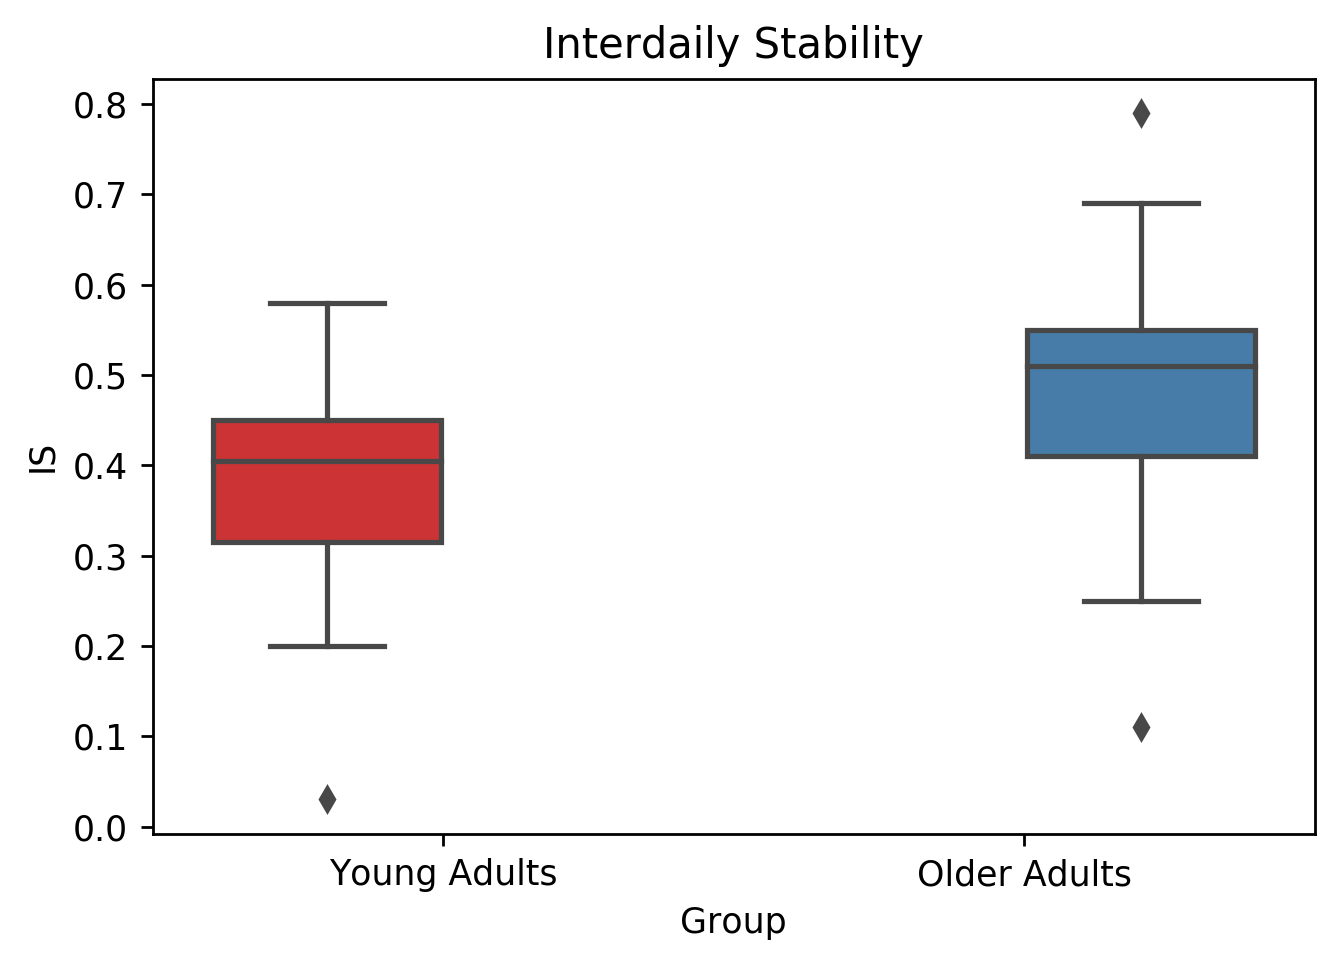

In [481]:
import seaborn as sns

plt.subplots(dpi=250)
sns.boxplot(x="Group", y="IS", hue="Group", data = df, palette="Set1")
plt.legend().set_visible(False)
plt.title('Interdaily Stability')


Text(0.5, 1.0, 'Acrophase')

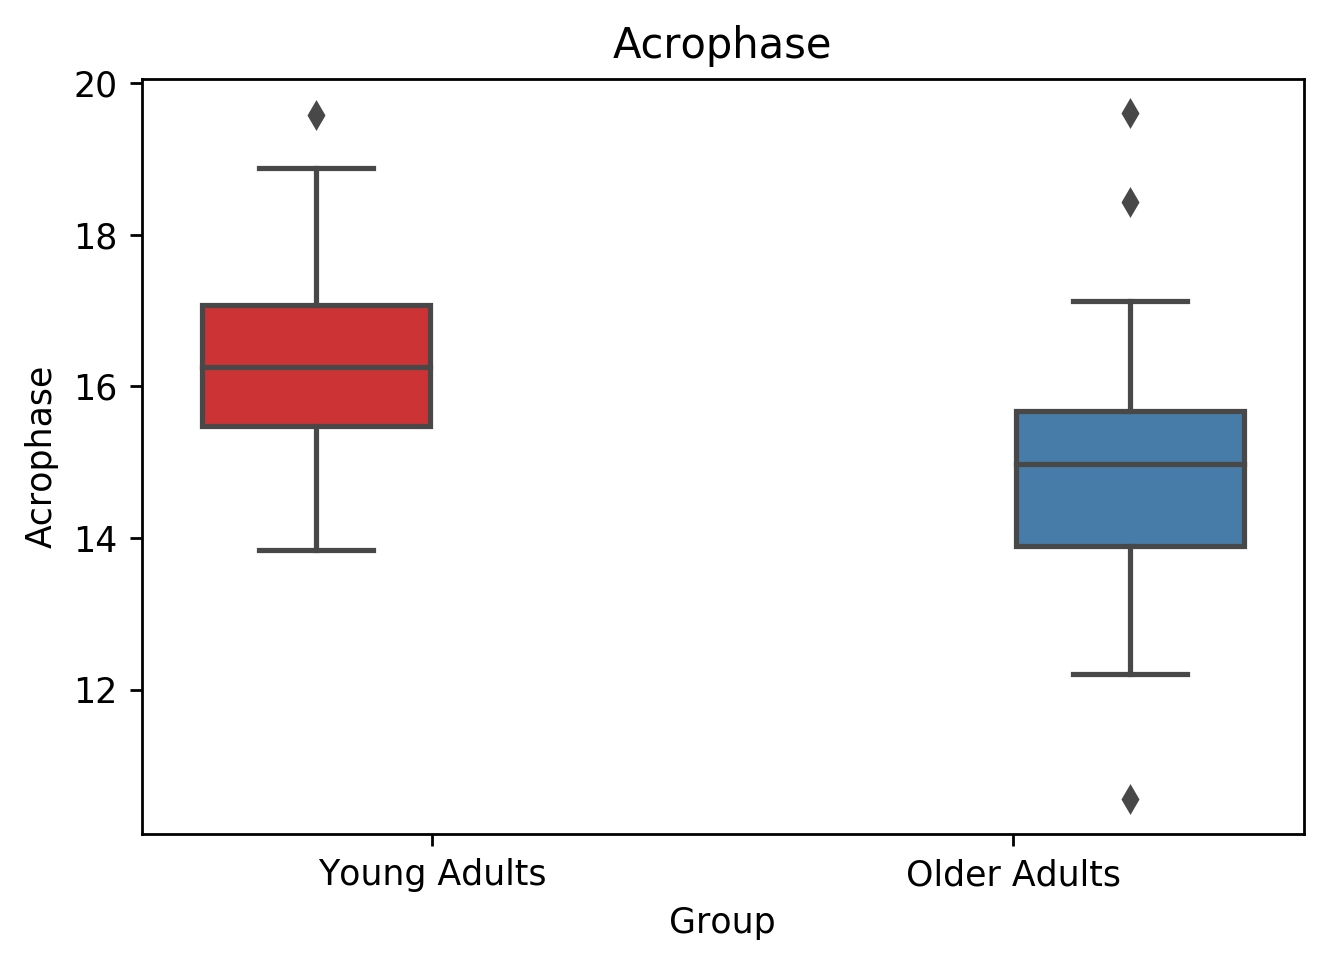

In [480]:
import seaborn as sns

plt.subplots(dpi=250)
sns.boxplot(x="Group", y="actphi", hue="Group", data = df, palette="Set1").set_ylabel('Acrophase')
plt.legend().set_visible(False)
plt.title('Acrophase')


Text(0.5, 1.0, 'Up-Mesor')

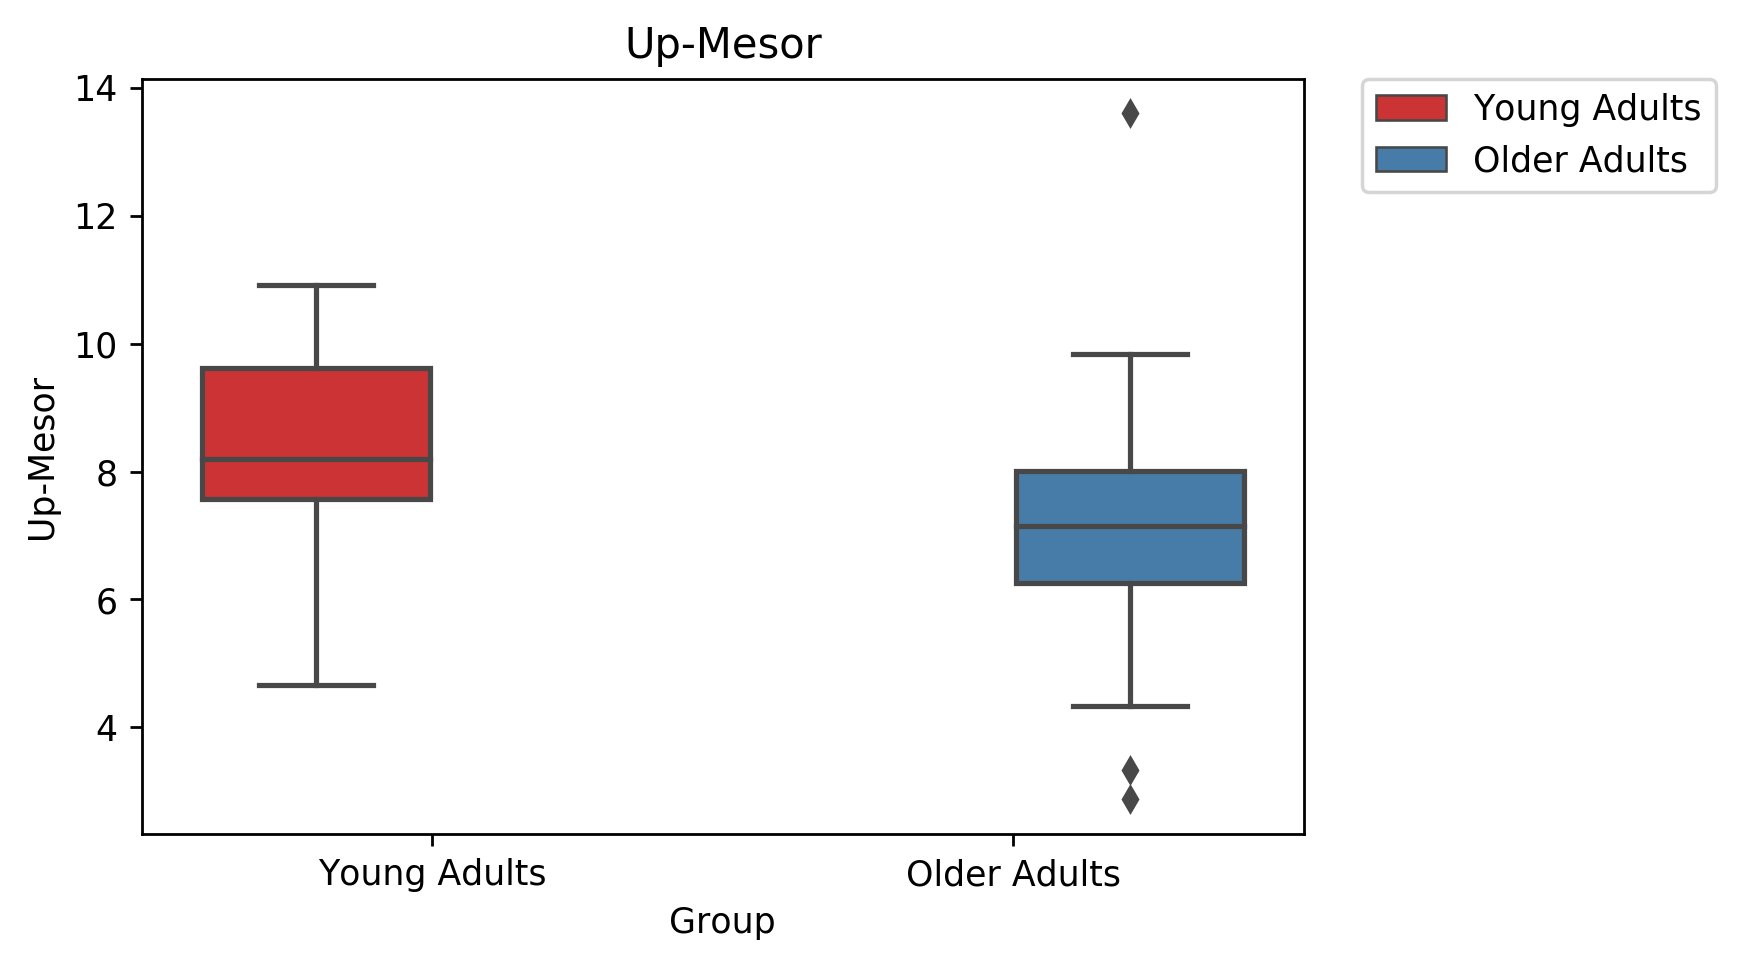

In [456]:
import seaborn as sns

plt.subplots(dpi=250)
sns.boxplot(x="Group", y="actupmesor", hue="Group", data = df, palette="Set1").set_ylabel('Up-Mesor')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Up-Mesor')


Text(0.5, 1.0, 'Down-Mesor')

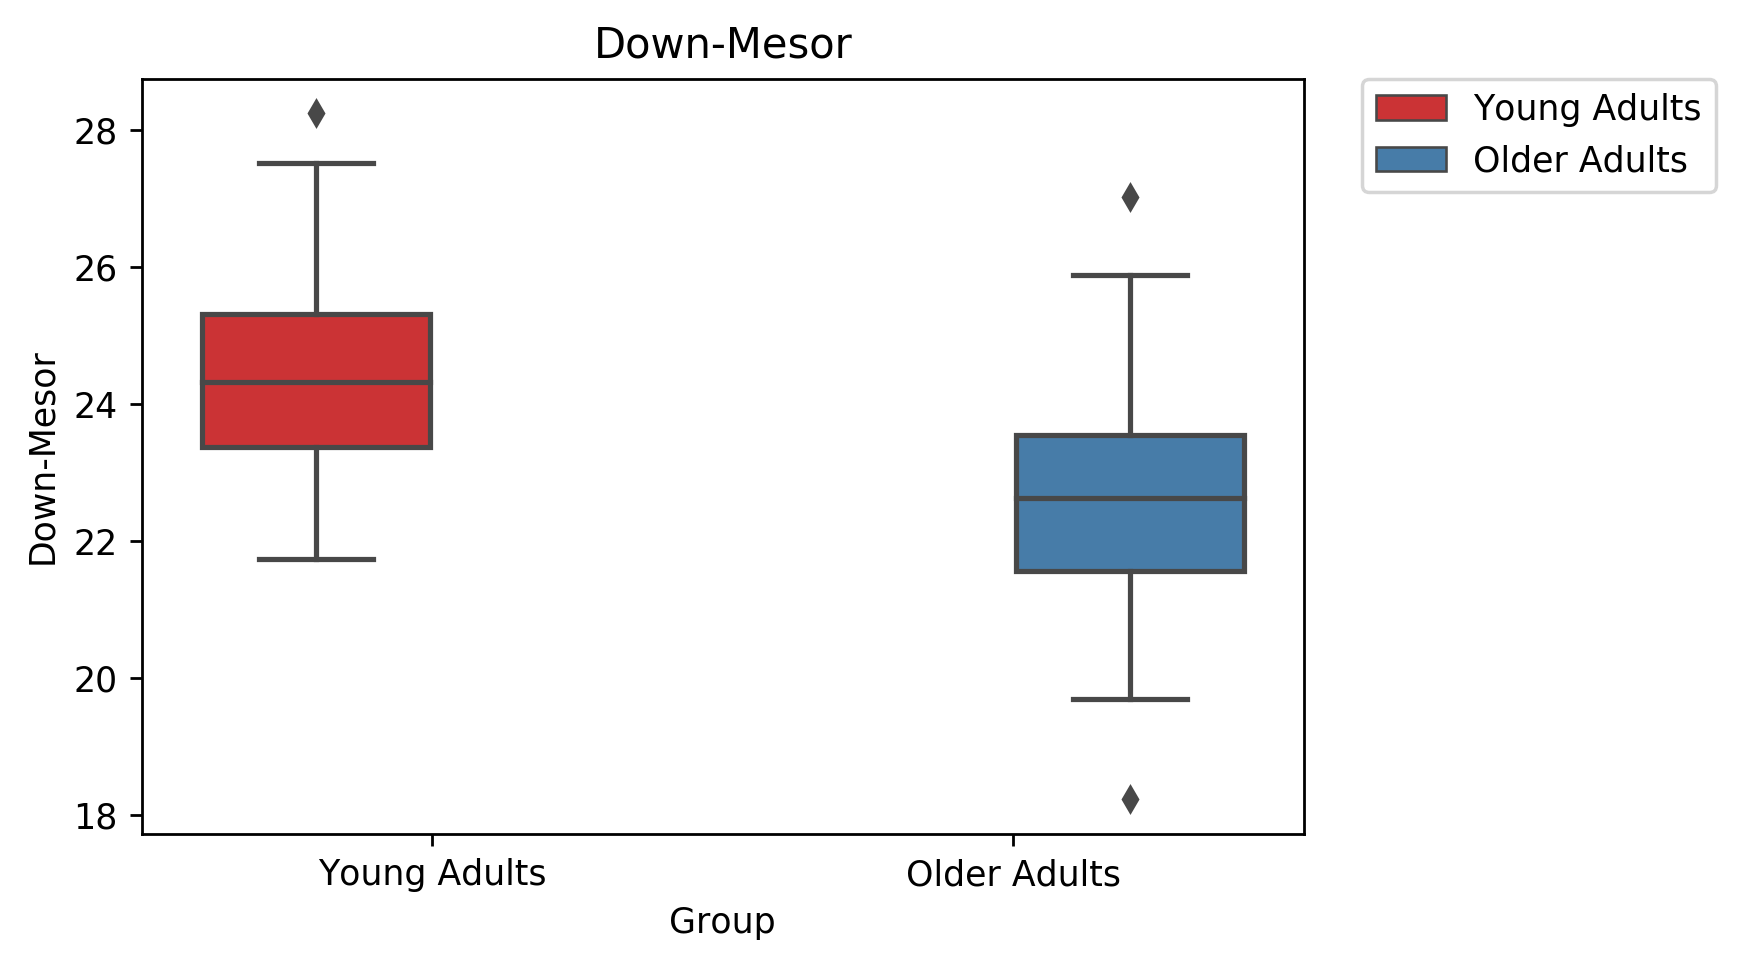

In [457]:
import seaborn as sns

plt.subplots(dpi=250)
sns.boxplot(x="Group", y="actdownmesor", hue="Group", data = df, palette="Set1").set_ylabel('Down-Mesor')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Down-Mesor')

Text(0.5, 1.0, 'Slope')

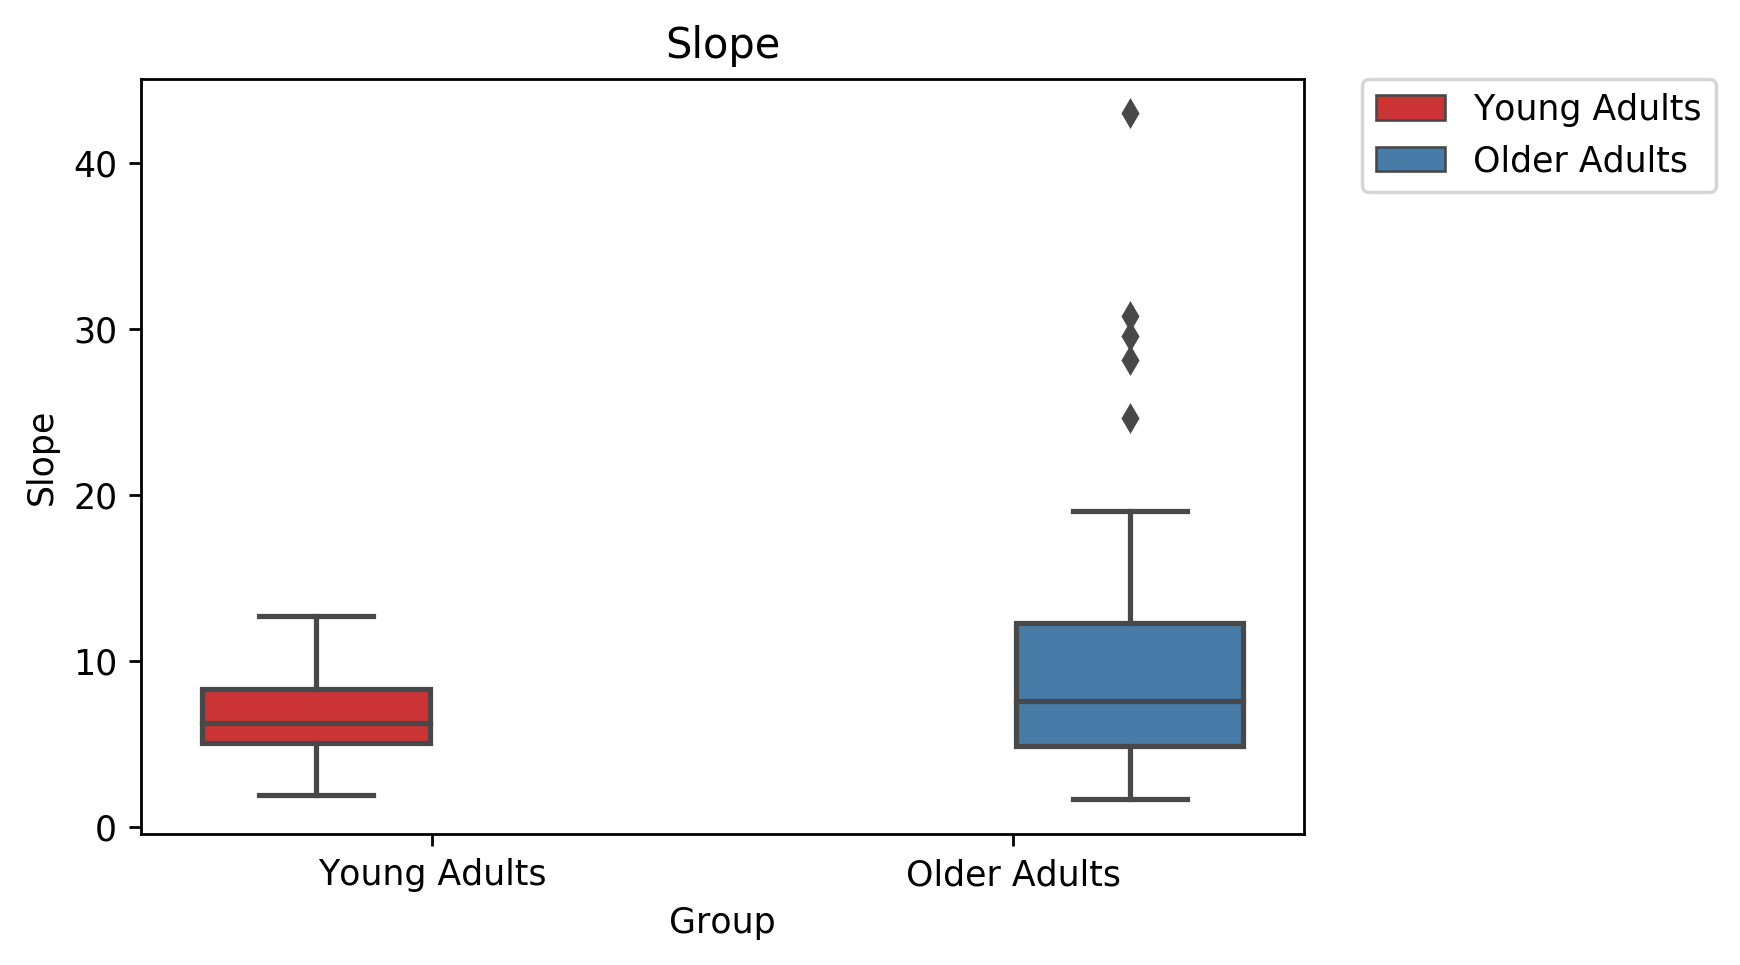

In [458]:
import seaborn as sns

plt.subplots(dpi=250)
sns.boxplot(x="Group", y="actbeta", hue="Group", data = df, palette="Set1").set_ylabel('Slope')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Slope')


Text(0.5, 1.0, 'Width')

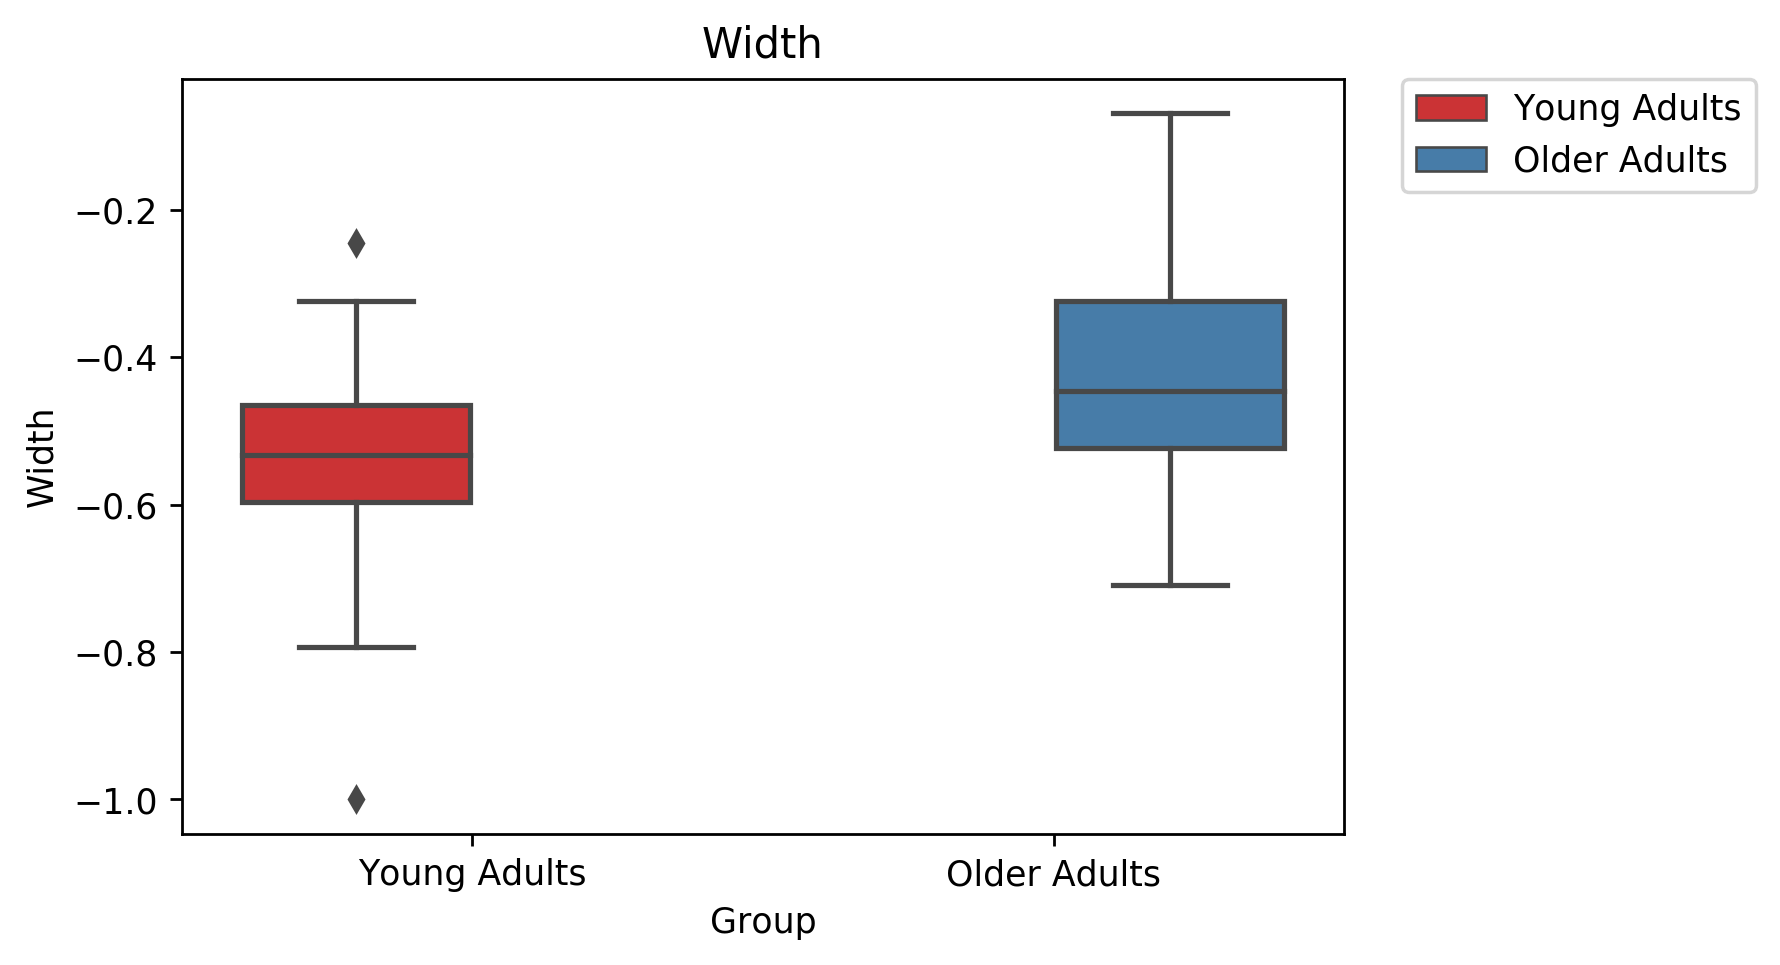

In [462]:
import seaborn as sns

plt.subplots(dpi=250)
sns.boxplot(x="Group", y="actalph", hue="Group", data = df[df['actalph'] < .75], palette="Set1").set_ylabel('Width')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Width')


In [466]:
beh.columns

Index(['record_id', 'age', 'sex', 'years_educ', 'IS', 'IV', 'RA', 'actamp',
       'actbeta', 'actphi', 'actmin', 'actmesor', 'actupmesor', 'actdownmesor',
       'actalph', 'actwidthratio', 'rsqact', 'fact', 'duration.sleep',
       'total_ac.sleep', 'wake_time.sleep', 'percent_wake.sleep',
       'sleep_time.sleep', 'percent_sleep.sleep', 'percent_immobile.sleep',
       'duration.active', 'total_ac.active', 'wake_time.active',
       'percent_wake.active', 'sleep_time.active', 'percent_sleep.active',
       'percent_immobile.active', 'percent_sleep', 'percent_sleep.max',
       'onset_latency', 'efficiency', 'sleep_time', 'percent_wake',
       'percent_immobile', 'cvlt_b_zscore', 'cvlt_sdelay_recall_zscore',
       'cvlt_sdelay_cued_zscore', 'cvlt_ldelay_recall_zscore',
       'cvlt_ldelay_cue_recall_zscore', 'cvlt_recognition_hits_zscore',
       'cvlt_recognition_fp_zscore', 'cvlt_zscore', 'vc_zscore', 'ds_zscore',
       'stoop_i_zscore', 'cowat_zscore', 'trails_a_z_score',
    

Text(0.5, 1.0, 'Total Sleep Time')

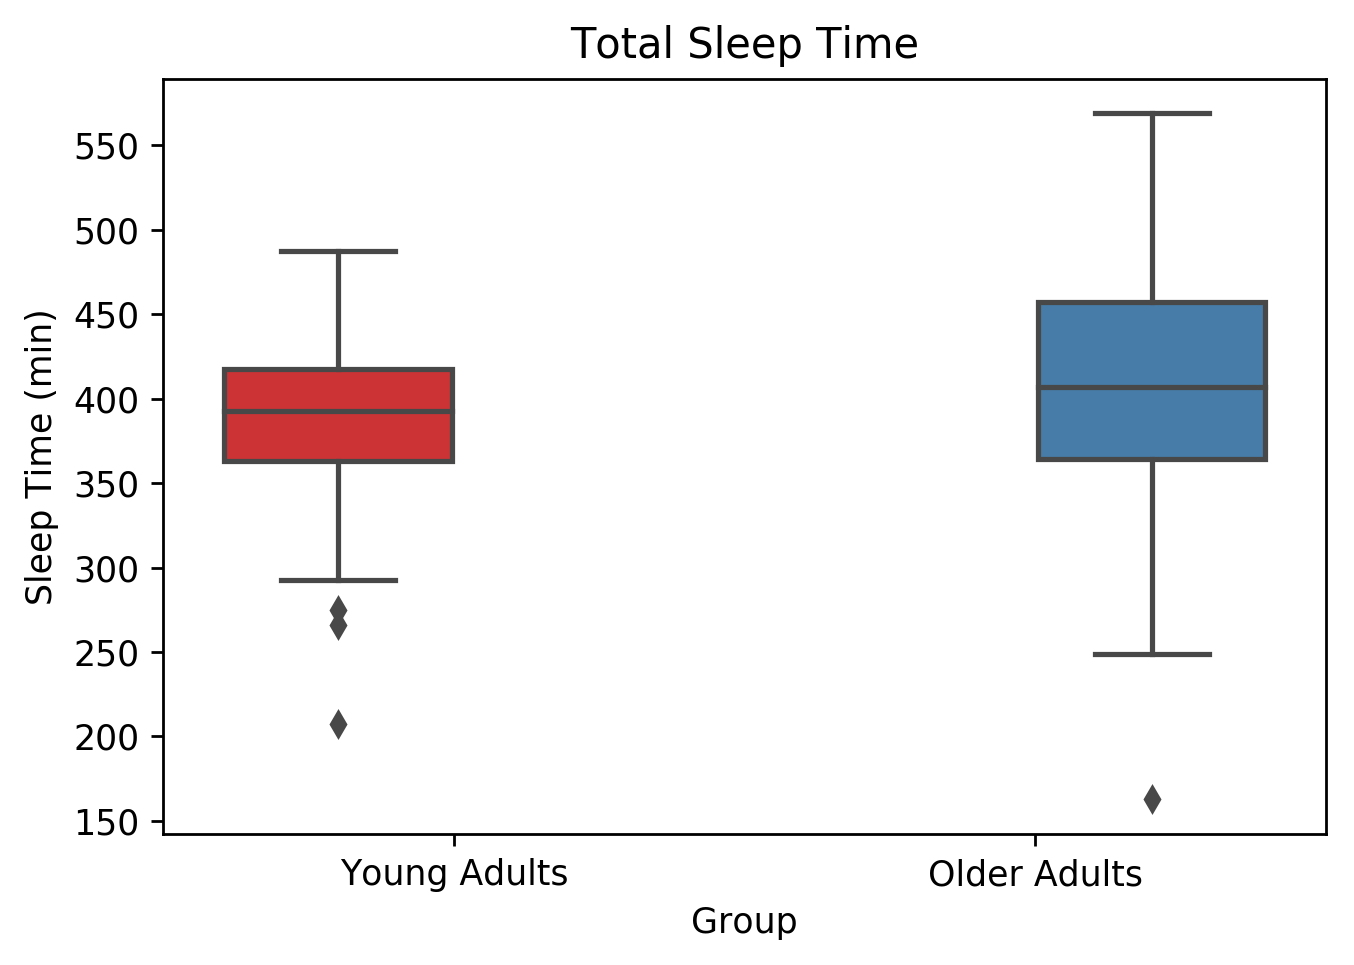

In [477]:
import seaborn as sns

plt.subplots(dpi=250)
sns.boxplot(x="Group", y="sleep_time.sleep", hue="Group", data = df, palette="Set1").set_ylabel('Sleep Time (min)')
plt.legend().set_visible(False)
plt.title('Total Sleep Time')

Text(0.5, 1.0, 'Onset Latency')

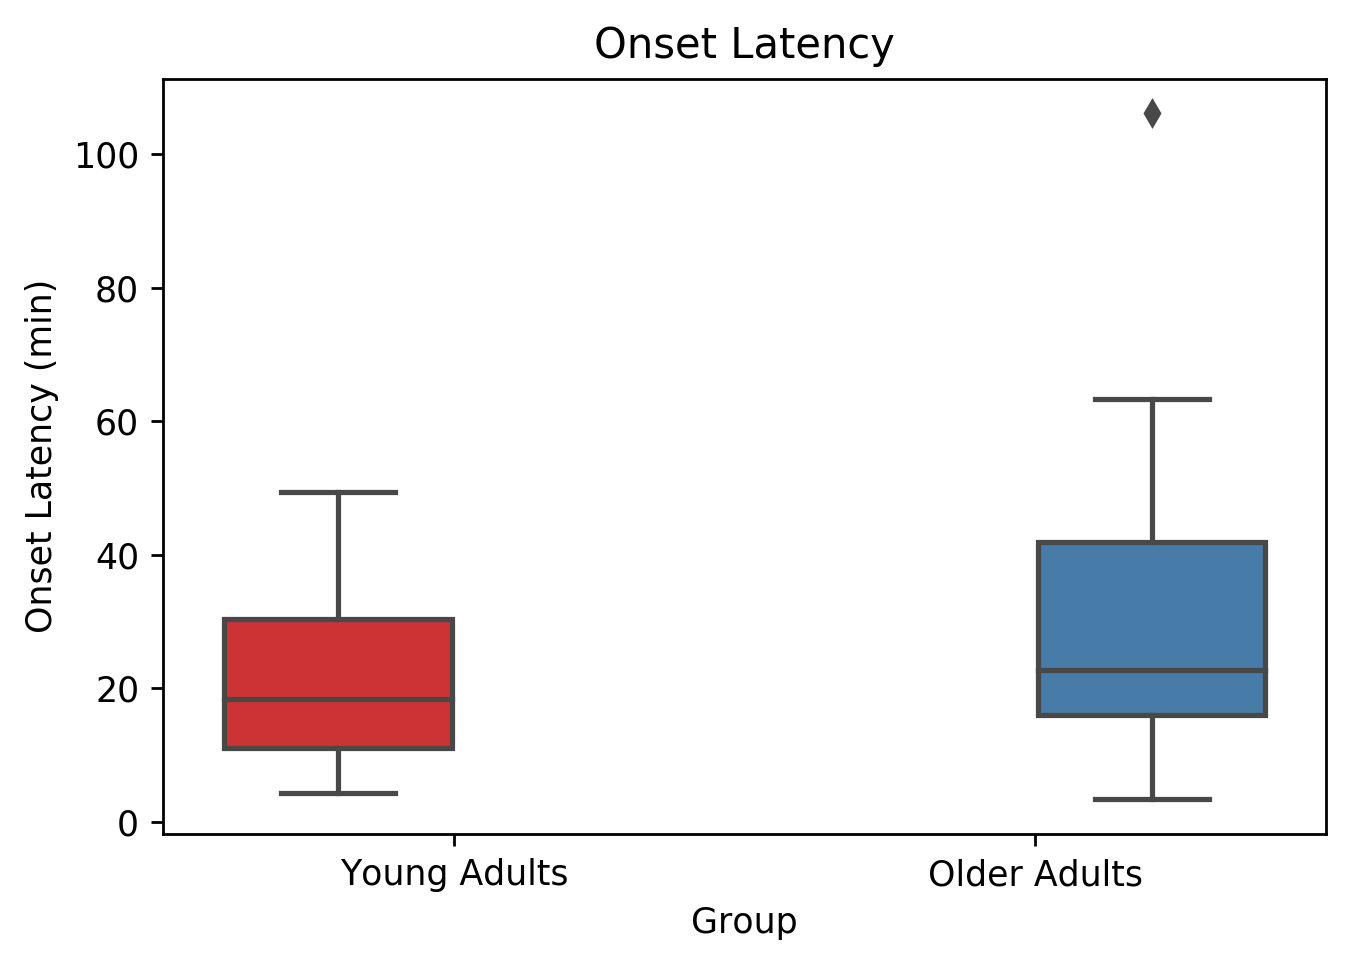

In [479]:
import seaborn as sns

plt.subplots(dpi=250)
sns.boxplot(x="Group", y="onset_latency", hue="Group", data = df, palette="Set1").set_ylabel('Onset Latency (min)')
plt.legend().set_visible(False)
plt.title('Onset Latency')

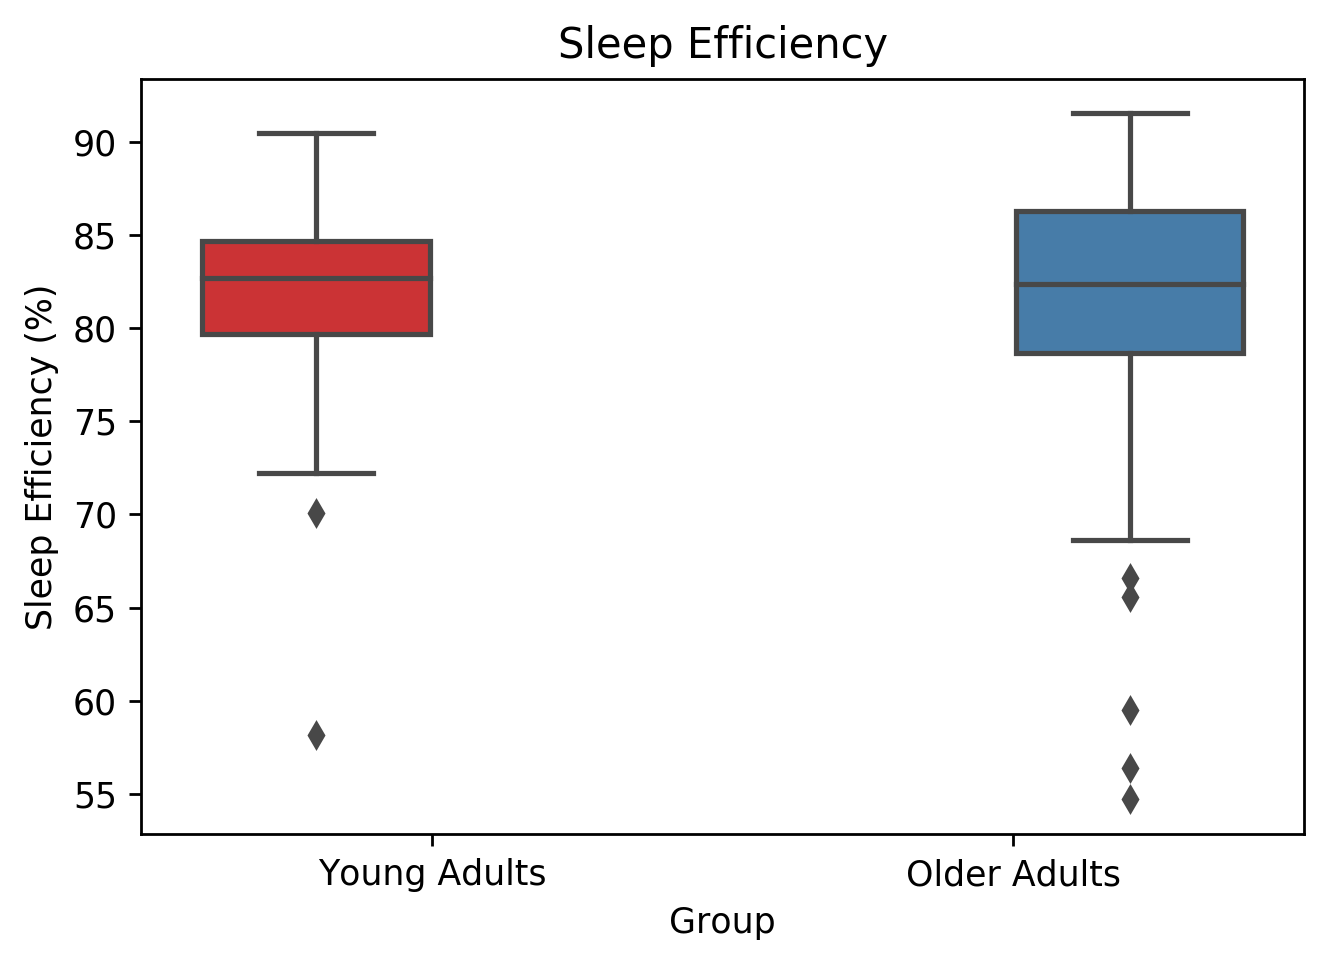

In [478]:
import seaborn as sns

plt.subplots(dpi=250)
sns.boxplot(x="Group", y="efficiency", hue="Group", data = df, palette="Set1").set_ylabel('Sleep Efficiency (%)')
plt.title('Sleep Efficiency')
plt.legend().set_visible(False)

## Microstructure measures

([<matplotlib.axis.XTick at 0x15c460690>,
 <a list of 2 Text xticklabel objects>)

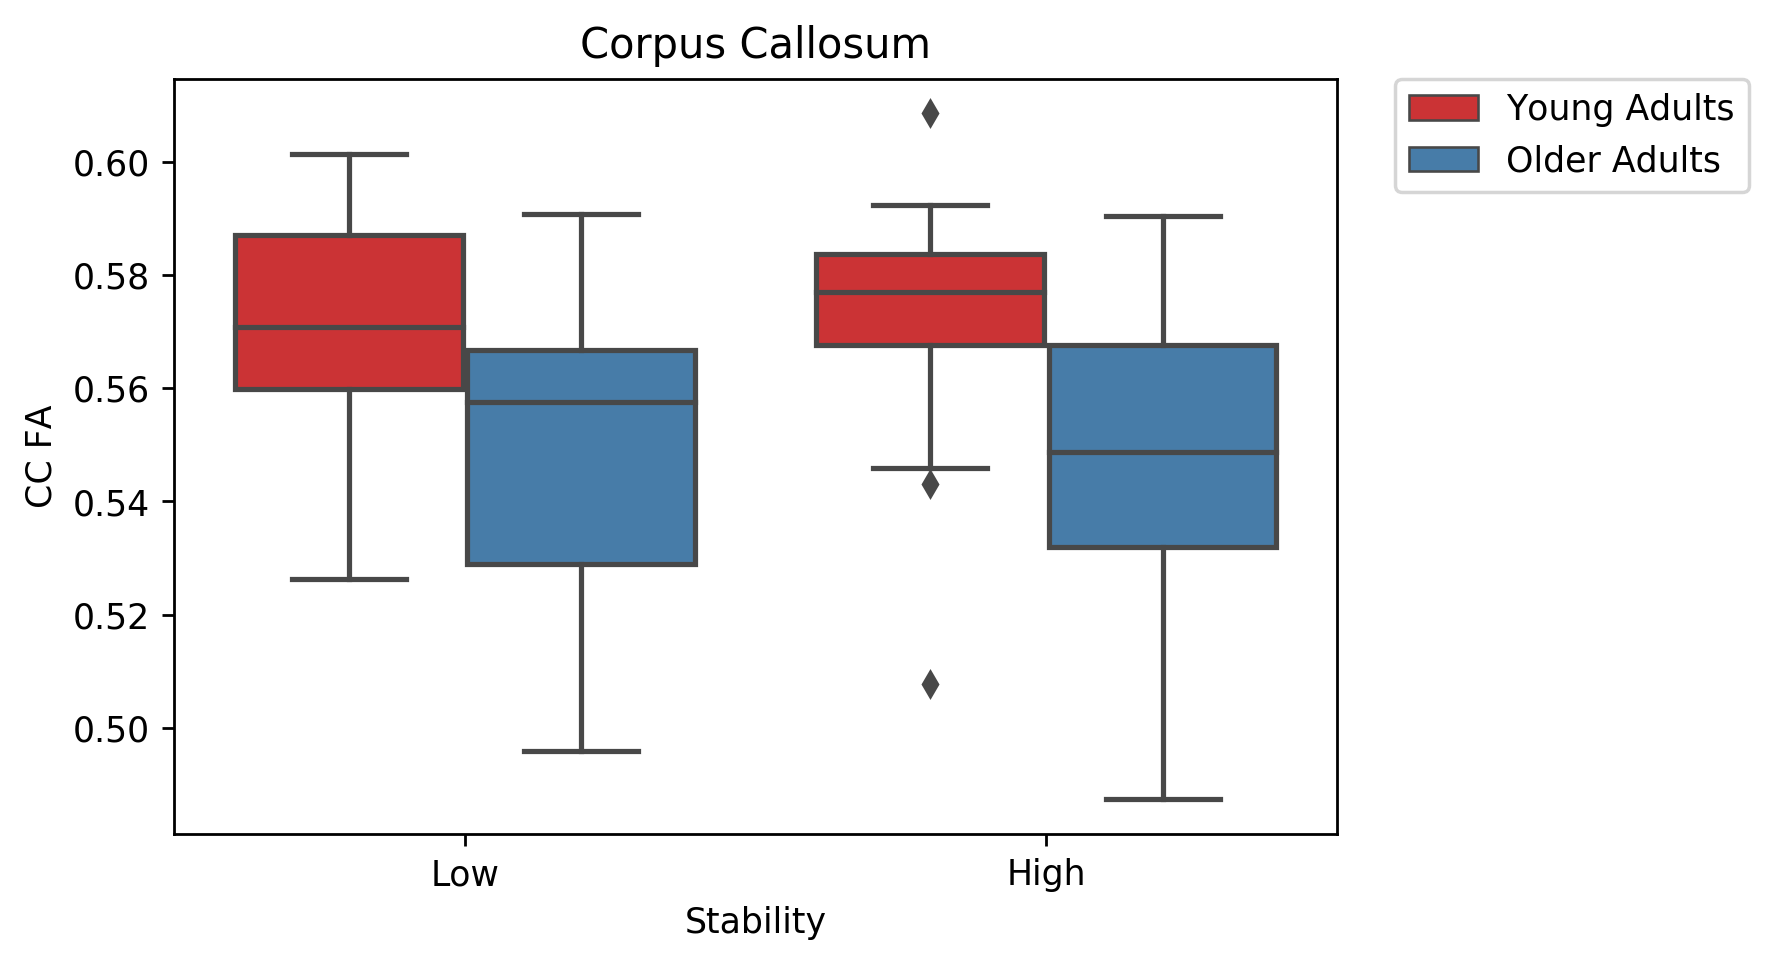

In [437]:
import seaborn as sns

plt.subplots(dpi=250)
sns.boxplot(x="Stability", y="CC_FA", hue="Group", data=df[df['Stability'] != 0], palette="Set1").set(ylabel='CC FA')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Corpus Callosum')
plt.xticks([0, 1], ['Low', 'High'])


([<matplotlib.axis.XTick at 0x15c4c6750>,
 <a list of 2 Text xticklabel objects>)

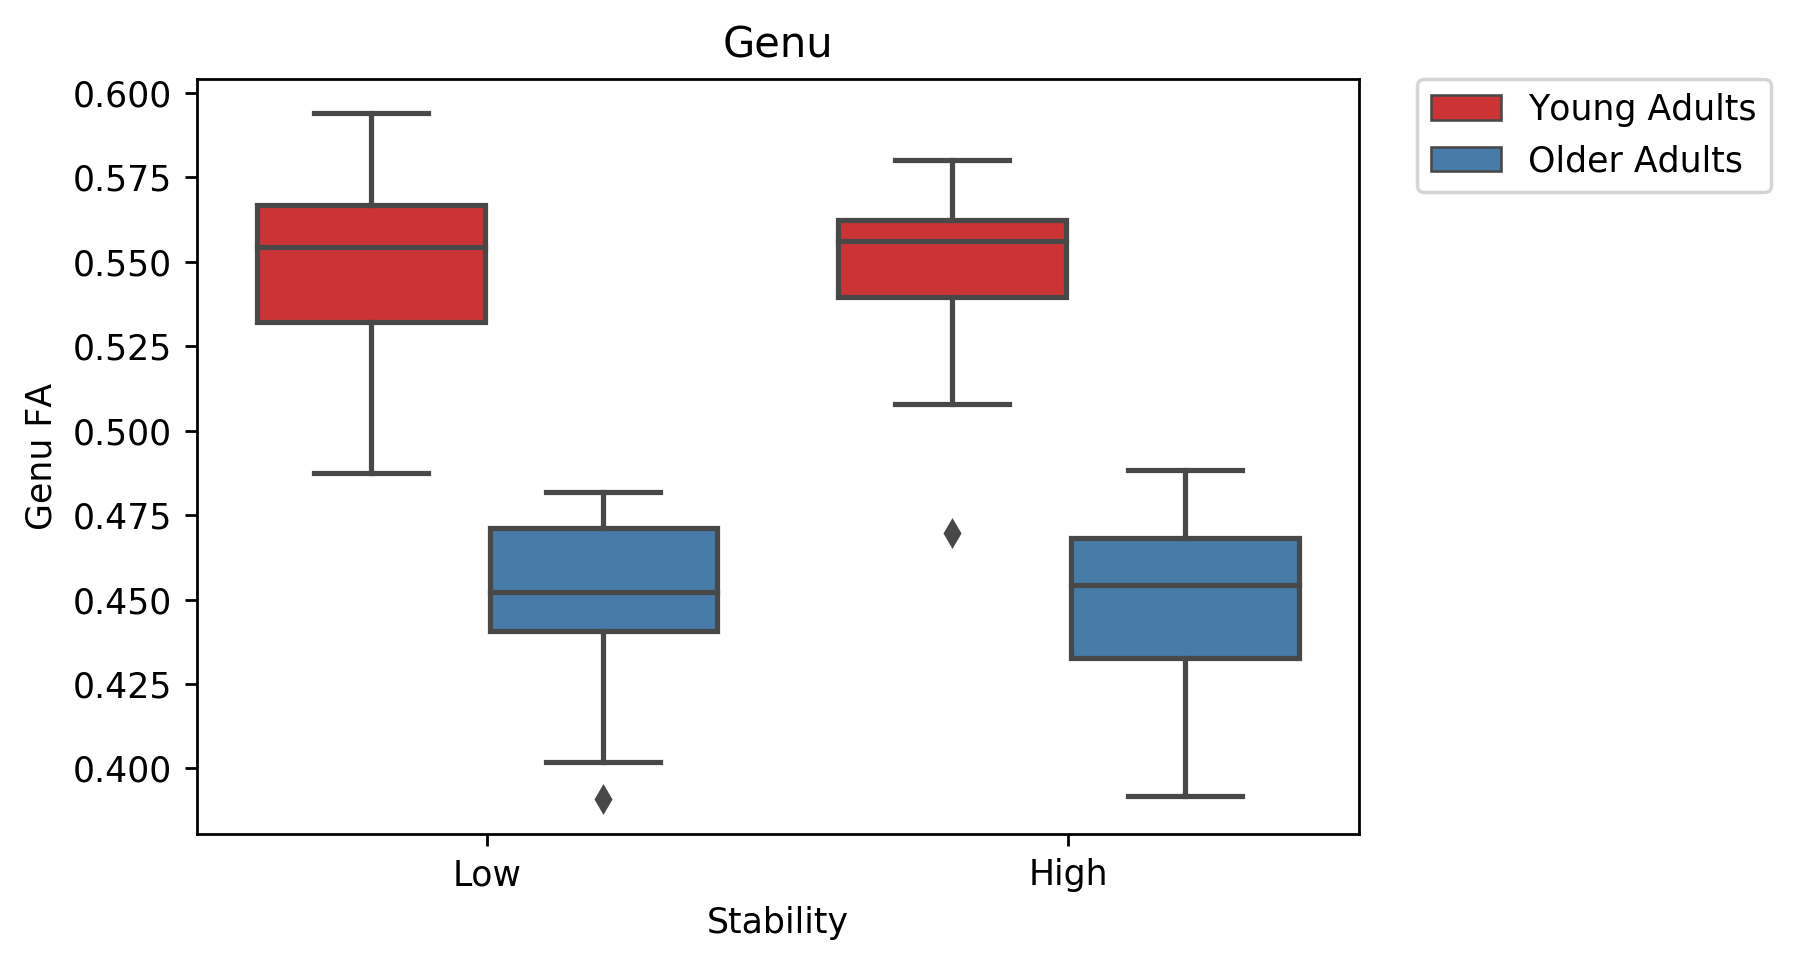

In [438]:
import seaborn as sns

plt.subplots(dpi=250)
sns.boxplot(x="Stability", y="genu_FA", hue="Group", data=df[df['Stability'] != 0], palette="Set1").set(ylabel='Genu FA')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Genu')
plt.xticks([0, 1], ['Low', 'High'])


([<matplotlib.axis.XTick at 0x15c576dd0>,
 <a list of 2 Text xticklabel objects>)

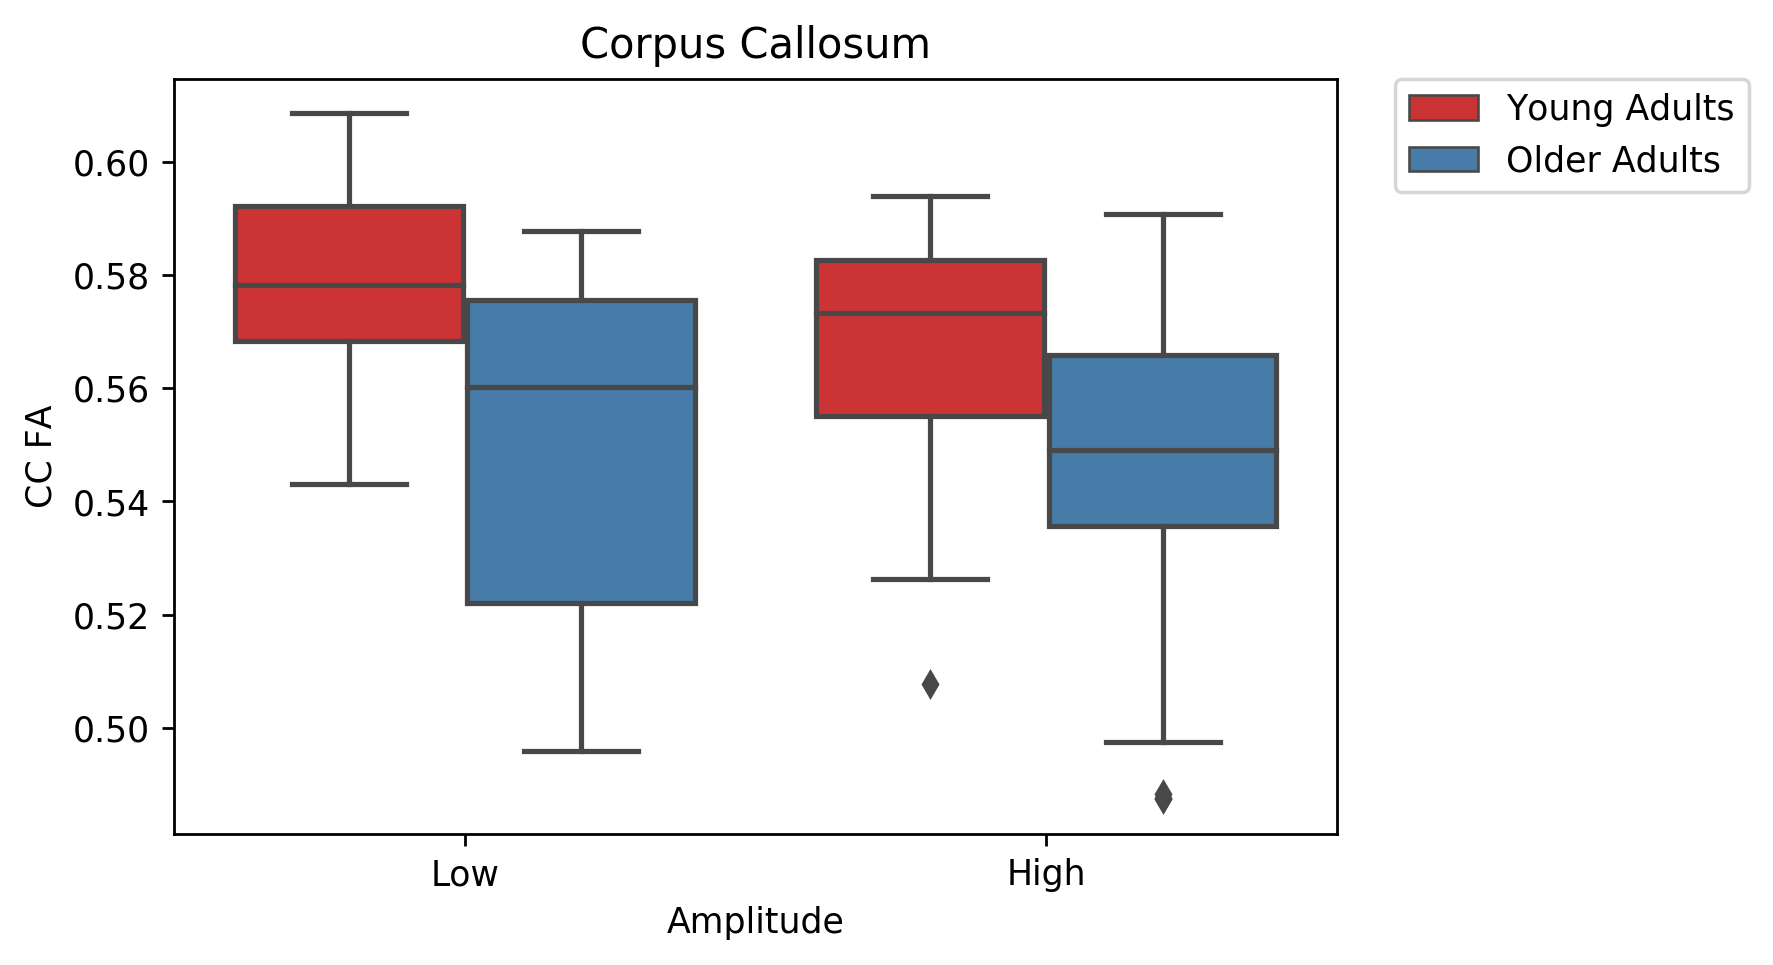

In [439]:
import seaborn as sns

plt.subplots(dpi=250)
sns.boxplot(x="Amplitude", y="CC_FA", hue="Group", data=df[df['Amplitude'] != 0], palette="Set1").set(ylabel='CC FA')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Corpus Callosum')
plt.xticks([0, 1], ['Low', 'High'])


([<matplotlib.axis.XTick at 0x15c61c710>,
 <a list of 2 Text xticklabel objects>)

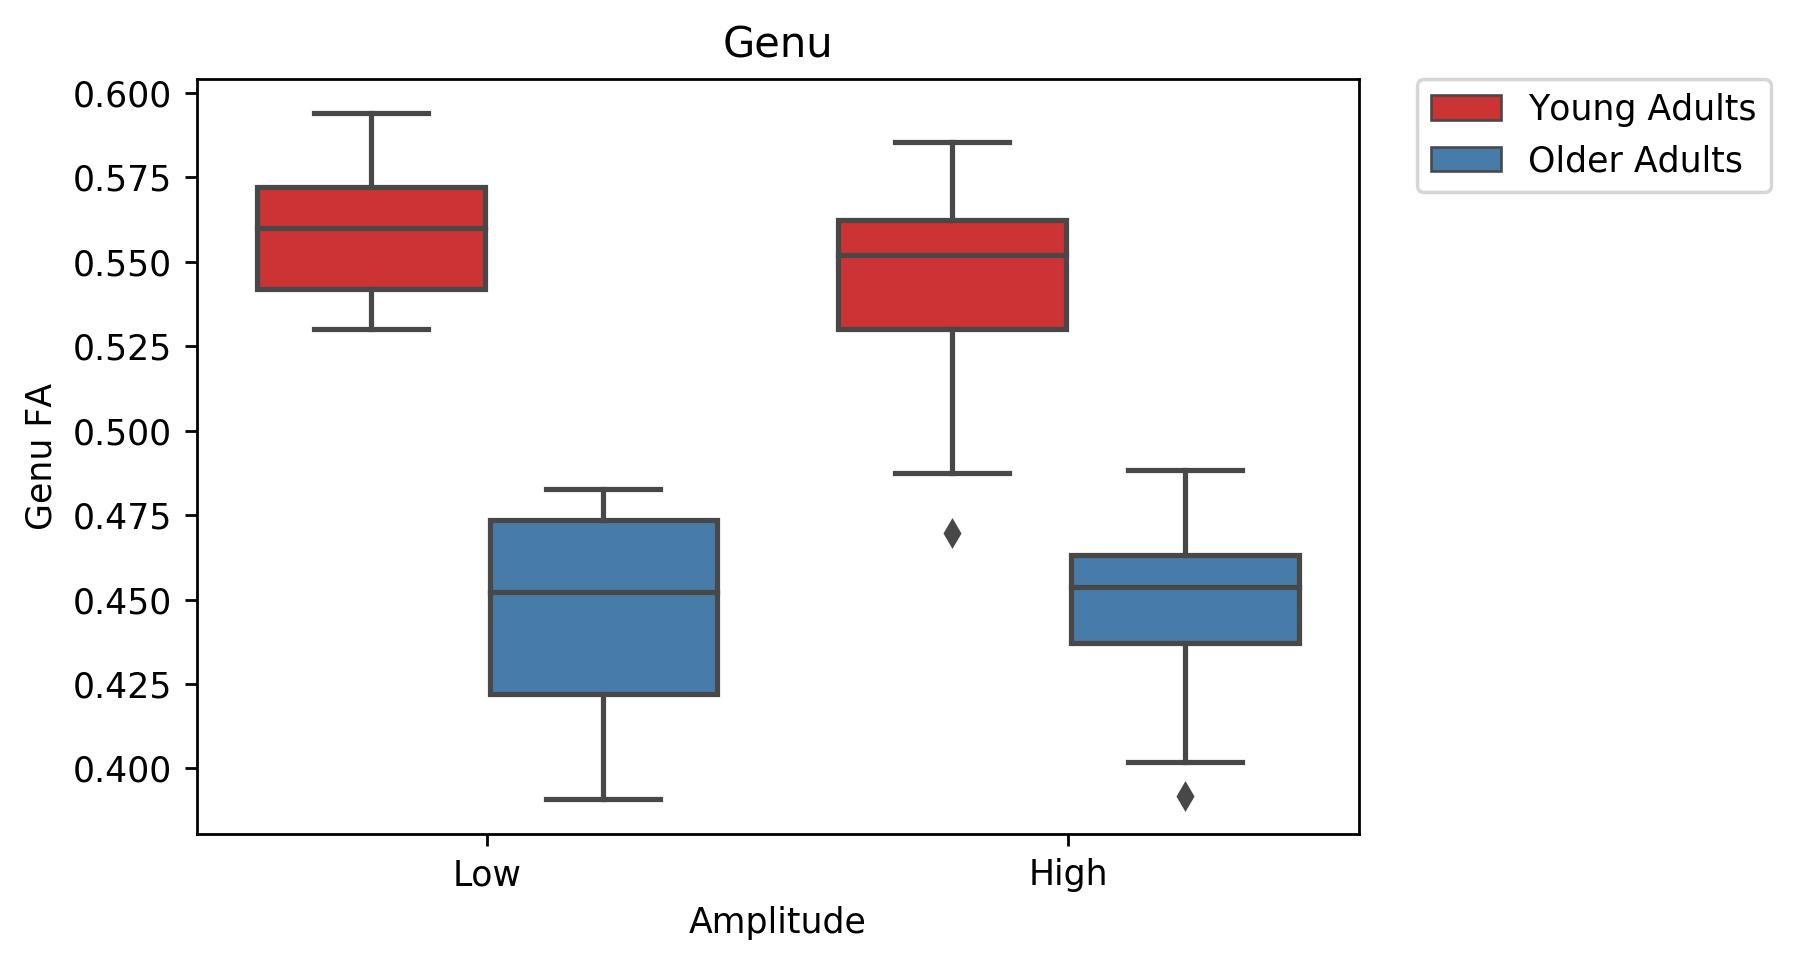

In [440]:
import seaborn as sns

plt.subplots(dpi=250)
sns.boxplot(x="Amplitude", y="genu_FA", hue="Group", data=df[df['Amplitude'] != 0], palette="Set1").set(ylabel='Genu FA')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Genu')
plt.xticks([0, 1], ['Low', 'High'])


([<matplotlib.axis.XTick at 0x15c6c6e90>,
 <a list of 2 Text xticklabel objects>)

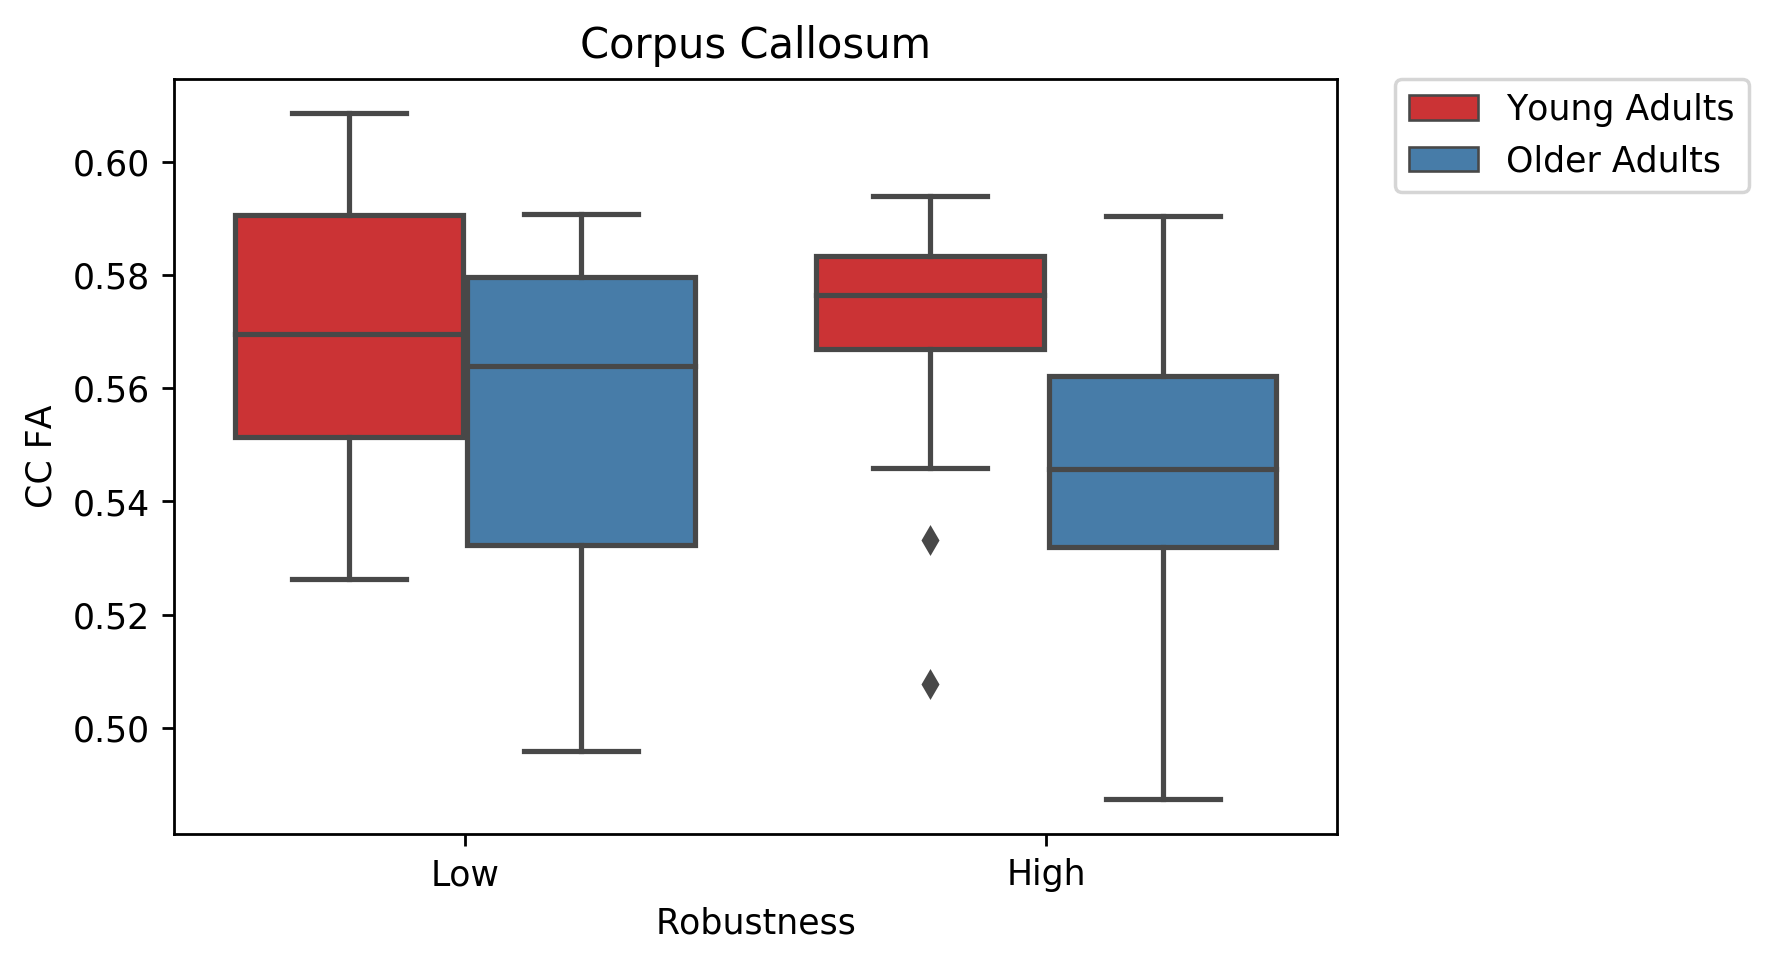

In [441]:
import seaborn as sns

plt.subplots(dpi=250)
ax = sns.boxplot(x="Robustness", y="CC_FA", hue="Group", data=df[df['Robustness'] != 0], palette="Set1").set(ylabel='CC FA')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Corpus Callosum')
plt.xticks([0, 1], ['Low', 'High'])


([<matplotlib.axis.XTick at 0x15c7716d0>,
 <a list of 2 Text xticklabel objects>)

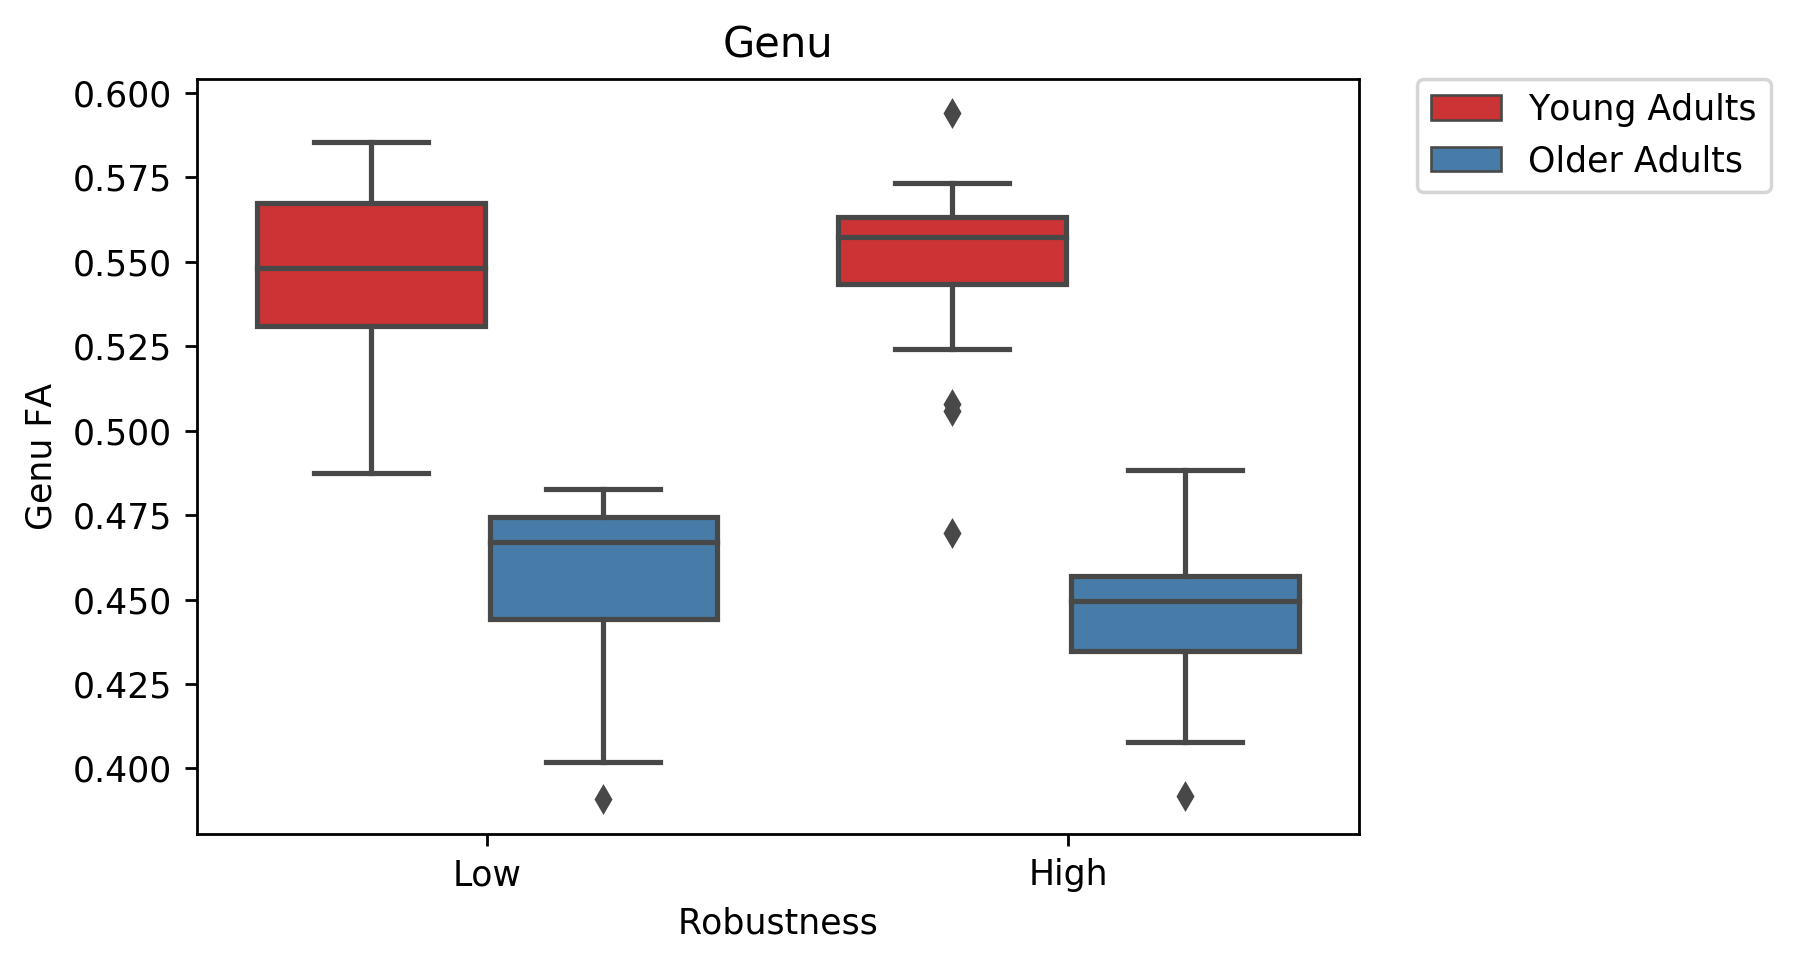

In [442]:
import seaborn as sns

plt.subplots(dpi=250)
sns.boxplot(x="Robustness", y="genu_FA", hue="Group", data=df[df['Robustness'] != 0], palette="Set1").set(ylabel='Genu FA')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Genu')
plt.xticks([0, 1], ['Low', 'High'])


([<matplotlib.axis.XTick at 0x15c81ad90>,
 <a list of 2 Text xticklabel objects>)

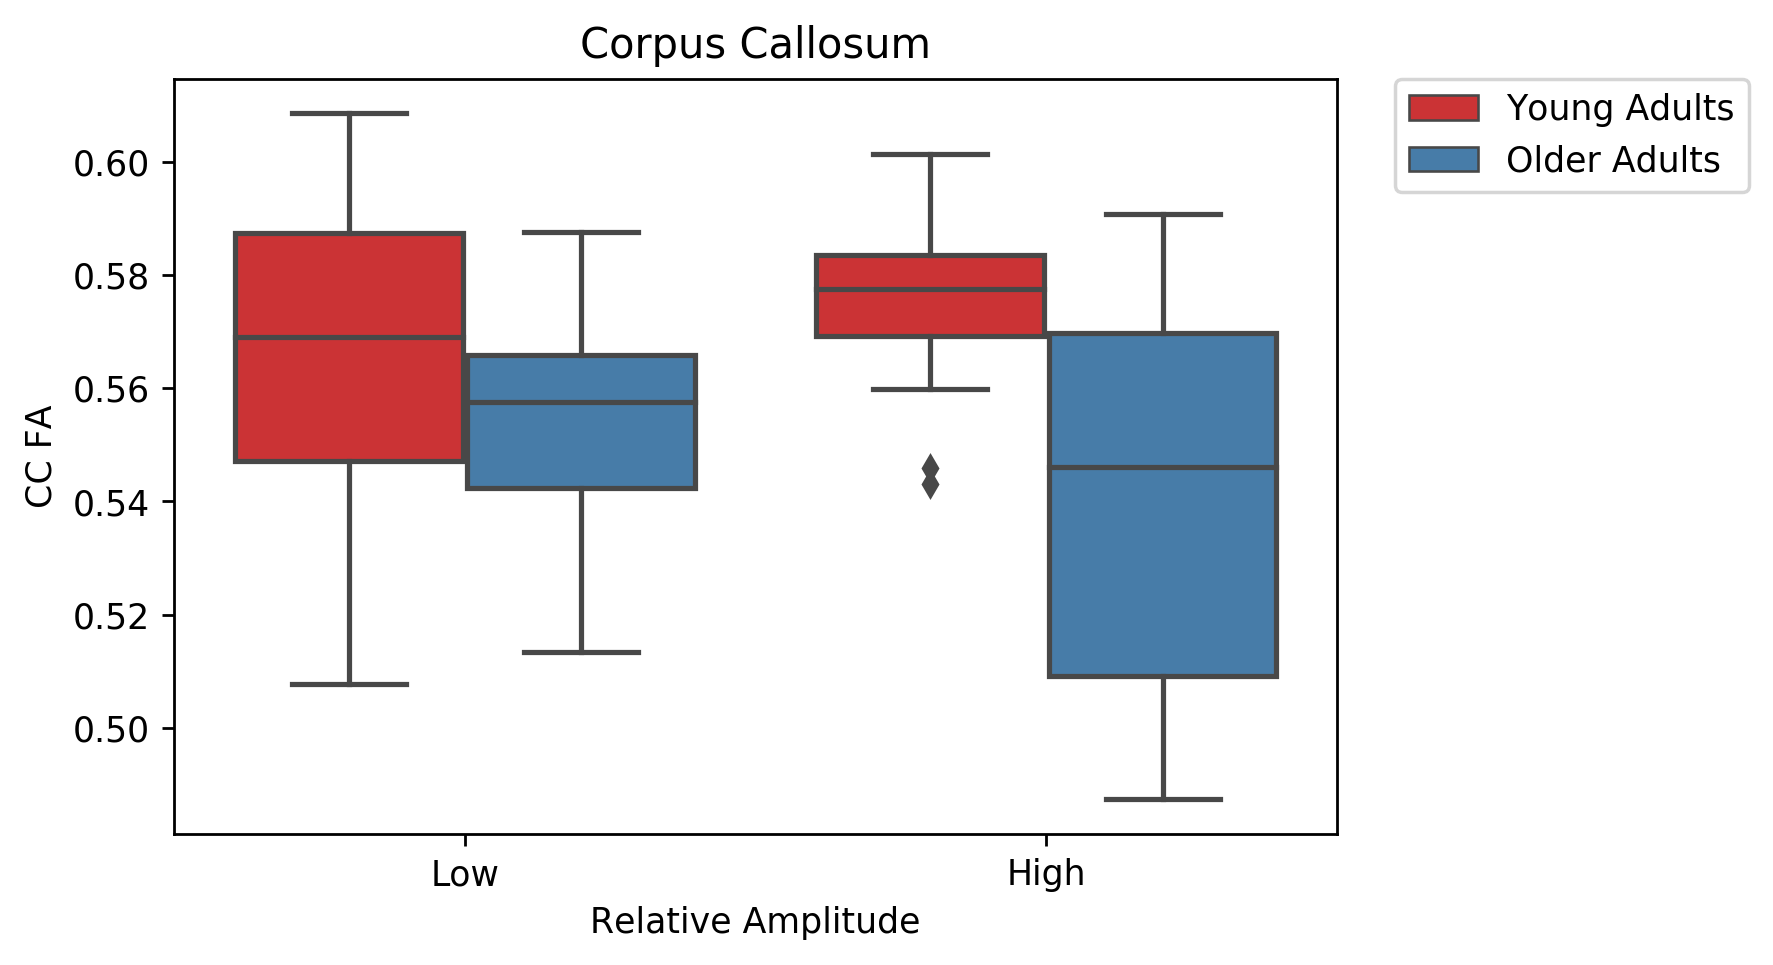

In [443]:
import seaborn as sns

plt.subplots(dpi=250)
sns.boxplot(x="Relative Amplitude", y="CC_FA", hue="Group", data=df[df['Relative Amplitude'] != 0], palette="Set1").set(ylabel='CC FA')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Corpus Callosum')
plt.xticks([0, 1], ['Low', 'High'])


([<matplotlib.axis.XTick at 0x15c8c2610>,
 <a list of 2 Text xticklabel objects>)

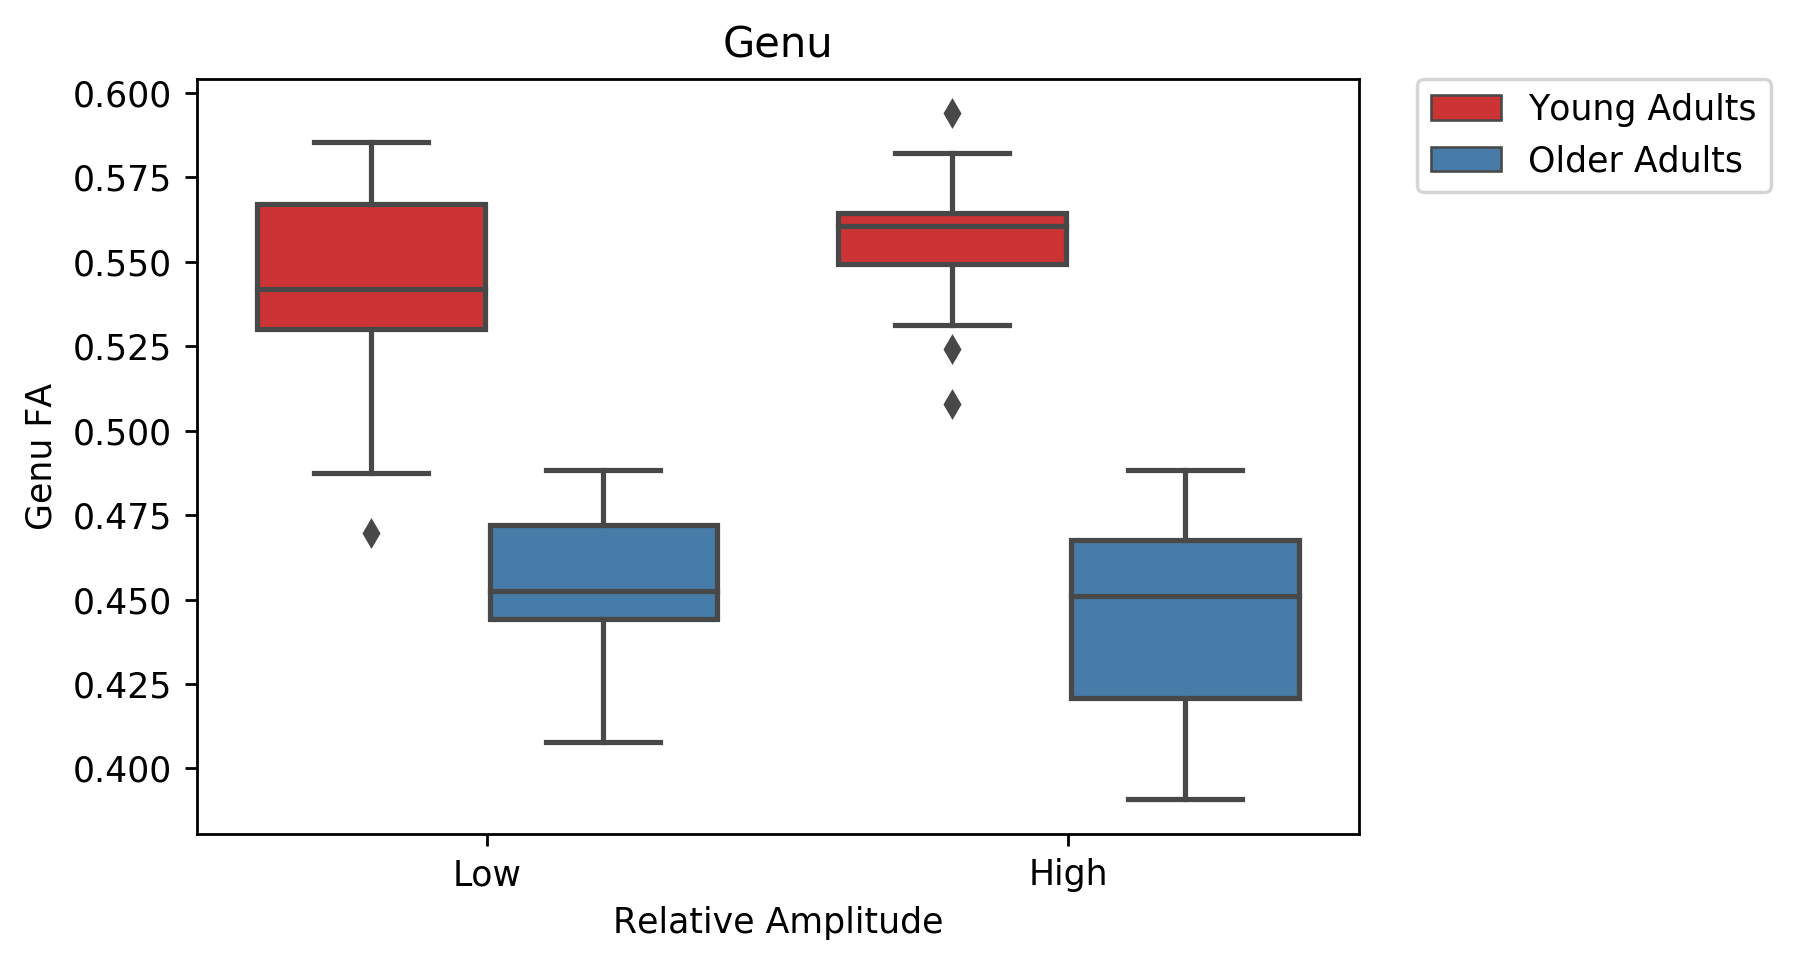

In [444]:
import seaborn as sns

plt.subplots(dpi=250)
sns.boxplot(x="Relative Amplitude", y="genu_FA", hue="Group", data=df[df['Relative Amplitude'] != 0], palette="Set1").set(ylabel='Genu FA')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Genu')
plt.xticks([0, 1], ['Low', 'High'])


([<matplotlib.axis.XTick at 0x15c96ddd0>,
 <a list of 2 Text xticklabel objects>)

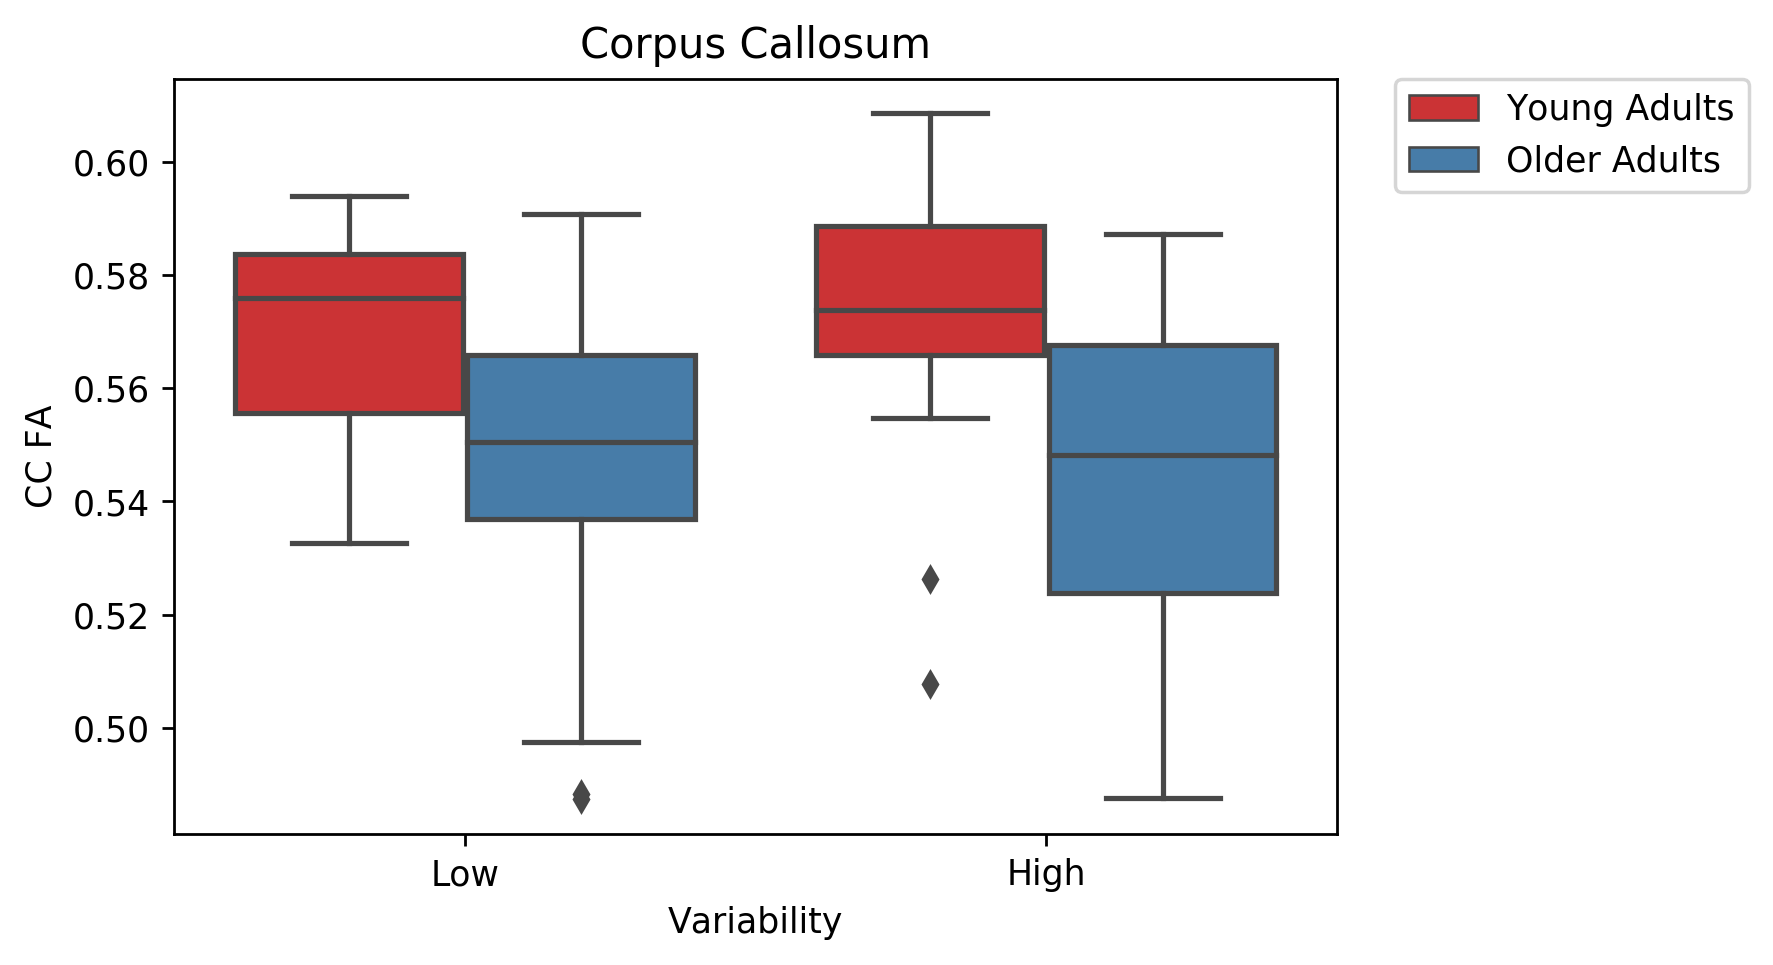

In [445]:
import seaborn as sns

plt.subplots(dpi=250)
sns.boxplot(x="Variability", y="CC_FA", hue="Group", data=df[df['Variability'] != 0], palette="Set1").set(ylabel='CC FA')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Corpus Callosum')
plt.xticks([0, 1], ['Low', 'High'])


([<matplotlib.axis.XTick at 0x15ca12450>,
 <a list of 2 Text xticklabel objects>)

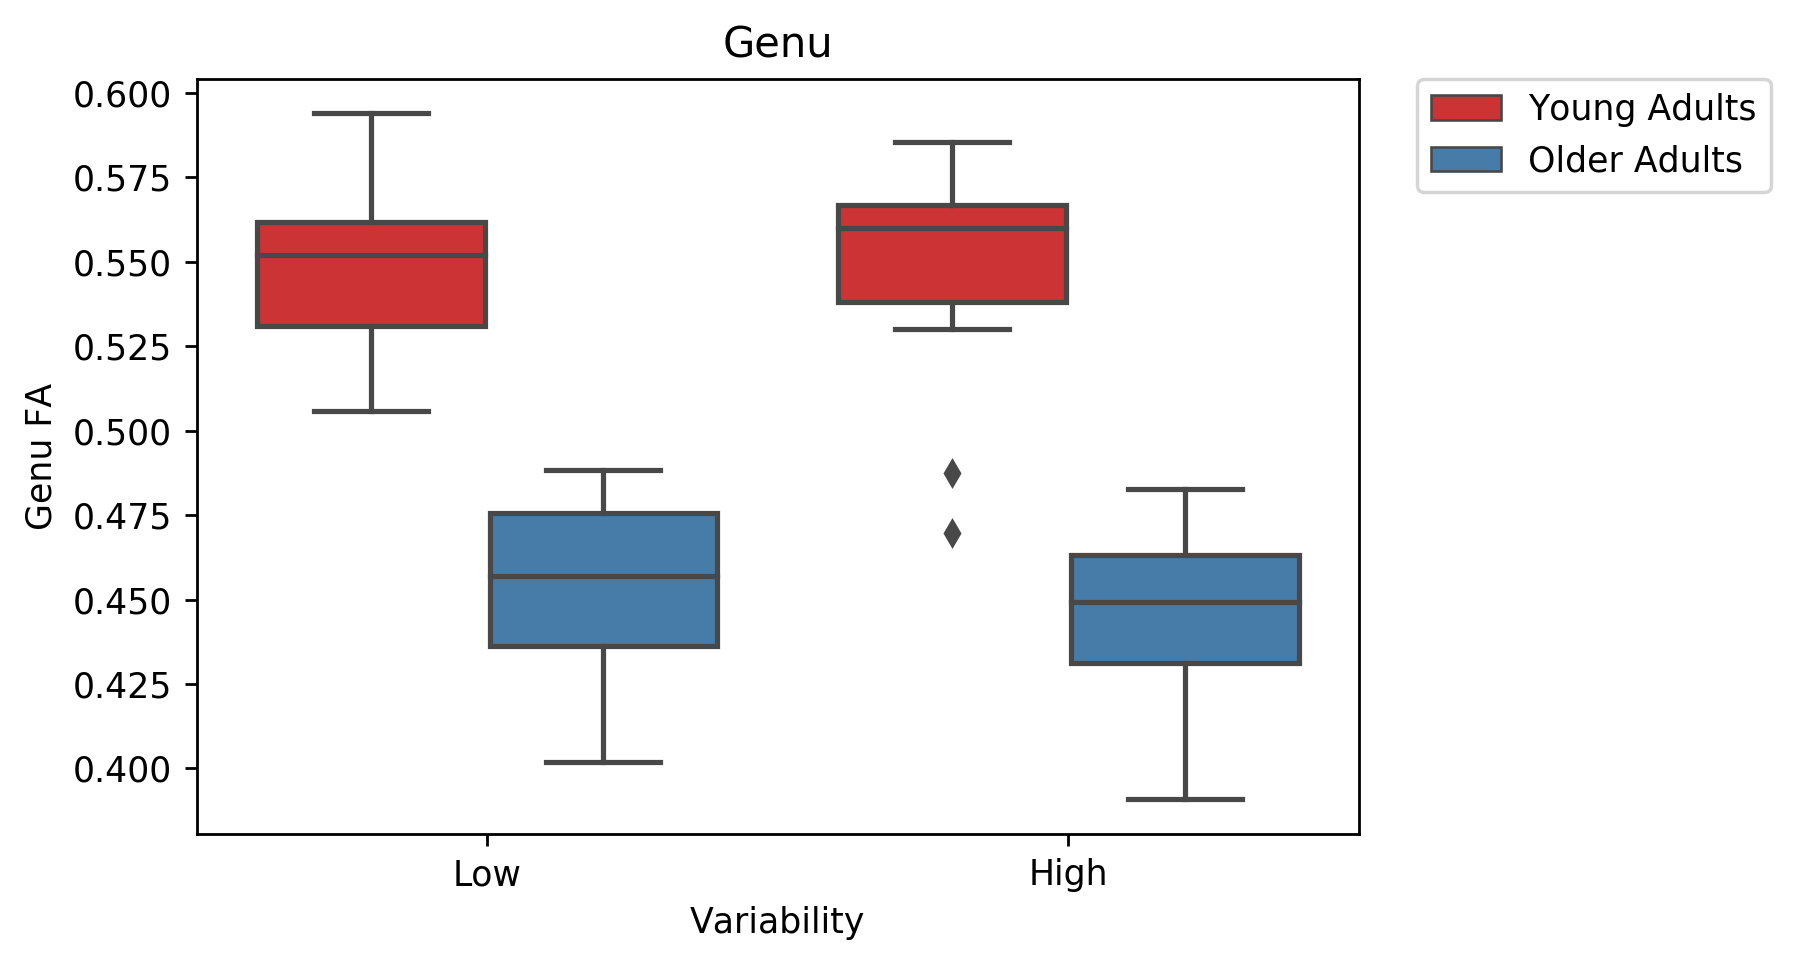

In [446]:
import seaborn as sns

plt.subplots(dpi=250)
sns.boxplot(x="Variability", y="genu_FA", hue="Group", data=df[df['Variability'] != 0], palette="Set1").set(ylabel='Genu FA')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Genu')
plt.xticks([0, 1], ['Low', 'High'])


## TFCE Linear Modeling

We're trying this with two design matrices, one with a column of ones to capture the group mean, and one without a column of ones. Missing values are imputed with the mean value, and then the values are demeaned.

Design matrix = \[ actalph-AVERAGE(actalph) \]
Design matrix = \[ actalph-AVERAGE(actalph) \]

Contrasts = \[0 1\], \[0,-1\]

Save contrasts to .txt file in tbss/stats directory

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

home_dir = '/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives'
box_dir = '/Users/PSYC-mcm5324/Box/CogNeuroLab/Aging Decision Making R01/Data/'
#df = pd.read_csv('/Users/PSYC-mcm5324/Box/CogNeuroLab/Aging Decision Making R01/Data/data_02_24_2020.csv')
#oa_df = df[df['Group'] == 'Older Adults']
#ya_df = df[df['Group'] == 'Young Adults']
#ya_df

0.08771929824561403

In [47]:
oa_dsn = oa_dsn.select_dtypes('float')
print(oa_dsn.shape)
oa_dsn.mean()

(57, 14)


actamp              1.579831
actbeta            14.561204
actphi             14.735185
actmin              0.164816
actmesor            0.954732
actupmesor          7.058775
actdownmesor       22.411596
actalph            -0.397889
actwidthratio       0.639701
rsqact              0.387990
fact             3543.546618
fnlrgact         1063.084525
Amplitude           0.153846
Robustness          0.076923
dtype: float64

In [49]:
oa_imp = oa_dsn.fillna(oa_dsn.mean())
oa_imp[0:5]

,actamp,actbeta,actphi,actmin,actmesor,actupmesor,actdownmesor,actalph,actwidthratio,rsqact,fact,fnlrgact,Amplitude,Robustness
record_id,,,,,,,,,,,,,,
40160,2.009123,4.375208,16.122209,0.000000,1.004561,8.679981,23.564437,-0.368665,0.620186,0.516000,5564.047418,670.974993,1.0,1.0
40170,1.000000,18.357338,11.793086,0.316077,0.816077,6.613137,16.973035,0.213045,0.431662,0.228348,1544.409707,482.808077,-1.0,-1.0
40175,3.145629,1.734867,19.382784,0.166639,1.739453,13.382784,25.382784,1.000000,0.500000,0.275306,1822.917235,140.006305,1.0,-1.0
40288,1.723074,7.834020,14.388184,0.060388,0.921925,6.822426,21.953941,-0.398529,0.630480,0.500125,5191.595489,1564.515483,1.0,1.0
40351,2.034903,2.818258,15.697647,0.000000,1.017451,8.838205,22.557089,-0.223106,0.571620,0.414192,3690.067984,98.713690,1.0,1.0


In [50]:
oa_dem = oa_imp - oa_imp.mean()
oa_dem[0:5]

,actamp,actbeta,actphi,actmin,actmesor,actupmesor,actdownmesor,actalph,actwidthratio,rsqact,fact,fnlrgact,Amplitude,Robustness
record_id,,,,,,,,,,,,,,
40160,0.429291,-10.185996,1.387024,-0.164816,0.049829,1.621206,1.152842,0.029224,-0.019515,0.128010,2020.500800,-392.109532,0.846154,0.923077
40170,-0.579831,3.796133,-2.942099,0.151261,-0.138654,-0.445638,-5.438561,0.610933,-0.208038,-0.159642,-1999.136911,-580.276448,-1.153846,-1.076923
40175,1.565798,-12.826337,4.647598,0.001822,0.784721,6.324009,2.971188,1.397889,-0.139701,-0.112684,-1720.629383,-923.078220,0.846154,-1.076923
40288,0.143243,-6.727185,-0.347002,-0.104428,-0.032807,-0.236349,-0.457655,-0.000640,-0.009221,0.112135,1648.048871,501.430958,0.846154,0.923077
40351,0.455072,-11.742947,0.962462,-0.164816,0.062719,1.779430,0.145494,0.174783,-0.068081,0.026202,146.521366,-964.370835,0.846154,0.923077


In [64]:
oa_dsn

,actamp,actbeta,actphi,actmin,actmesor,actupmesor,actdownmesor,actalph,actwidthratio,rsqact,fact,fnlrgact,Amplitude,Robustness
record_id,,,,,,,,,,,,,,
40160,2.009123,4.375208,16.122209,0.000000,1.004561,8.679981,23.564437,-0.368665,0.620186,0.516000,5564.047418,670.974993,1.0,1.0
40170,1.000000,18.357338,11.793086,0.316077,0.816077,6.613137,16.973035,0.213045,0.431662,0.228348,1544.409707,482.808077,-1.0,-1.0
40175,3.145629,1.734867,19.382784,0.166639,1.739453,13.382784,25.382784,1.000000,0.500000,0.275306,1822.917235,140.006305,1.0,-1.0
40288,1.723074,7.834020,14.388184,0.060388,0.921925,6.822426,21.953941,-0.398529,0.630480,0.500125,5191.595489,1564.515483,1.0,1.0
40351,2.034903,2.818258,15.697647,0.000000,1.017451,8.838205,22.557089,-0.223106,0.571620,0.414192,3690.067984,98.713690,1.0,1.0
40490,1.494343,7.446880,16.223988,0.150002,0.897174,7.636321,24.811655,-0.626806,0.715639,0.292686,2159.613765,1077.492198,-1.0,-1.0
40496,1.856626,4.708866,14.932983,0.108322,1.036635,8.295505,21.570462,-0.166116,0.553123,0.480890,4806.951071,459.318990,1.0,1.0
40512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40519,1.484620,16.917736,16.443227,0.162149,0.904459,8.550522,24.335932,-0.475478,0.657725,0.389888,3335.166036,1057.308224,-1.0,1.0


In [52]:
ya_dsn = ya_dsn.select_dtypes('float')
ya_dsn.mean()

actamp              1.602633
actbeta             6.477310
actphi             16.376720
actmin              0.135357
actmesor            0.936674
actupmesor          8.482475
actdownmesor       24.270965
actalph            -0.495510
actwidthratio       0.657854
rsqact              0.340135
fact             2959.468260
fnlrgact          911.689669
Amplitude           0.078947
Robustness          0.026316
dtype: float64

In [ ]:
tbss_fill tbss_oa_amp7_skel_tfce_corrp_tstat1 0.95 mean_FA tbss_fill_amp7
tbss_fill tbss_ya_amp7_skel_tfce_corrp_tstat1 0.95 mean_FA tbss_fill_amp7

In [60]:
ya_dsn.isnull().sum()

actamp           9
actbeta          9
actphi           9
actmin           9
actmesor         9
actupmesor       9
actdownmesor     9
actalph          9
actwidthratio    9
rsqact           9
fact             9
fnlrgact         9
Amplitude        8
Robustness       8
dtype: int64

In [54]:
ya_imp = ya_dsn.fillna(ya_dsn.mean())
ya_dem = ya_imp - ya_dsn.mean()
ya_dem.shape

(46, 14)

In [55]:
# np.savetxt(home_dir + '/tbss_oa/stats/design_IS_03-2020.txt', oa_dem['IS'].values, fmt = '%f')
# np.savetxt(home_dir + '/tbss_oa/stats/design_IV_03-2020.txt', oa_dem['IV'].values, fmt = '%f')
# np.savetxt(home_dir + '/tbss_oa/stats/design_RA_03-2020.txt', oa_dem['RA'].values, fmt = '%f')
# np.savetxt(home_dir + '/tbss_oa/stats/design_alpha7_03-2020.txt', oa_dem['actalph'].values, fmt = '%f')
# np.savetxt(home_dir + '/tbss_oa/stats/design_beta7_03-2020.txt', oa_dem['actbeta'].values, fmt = '%f')
# np.savetxt(home_dir + '/tbss_oa/stats/design_upmesor7_03-2020.txt', oa_dem['actupmesor'].values, fmt = '%f')
np.savetxt(home_dir + '/tbss_oa/stats/design_amp7_03-2020.txt', oa_dem['actamp'].values, fmt = '%f')
np.savetxt(home_dir + '/tbss_oa/stats/design_fact7_03-2020.txt', oa_dem['fact'].values, fmt = '%f')


In [139]:
oa_dem['IS'].values

array([ 1.15306122e-01, -2.34693878e-01,  1.11022302e-16,  2.05306122e-01,
       -1.04693878e-01, -2.04693878e-01,  1.85306122e-01, -1.44693878e-01,
       -5.46938776e-02,  1.65306122e-01,  5.53061224e-02,  2.53061224e-02,
       -1.64693878e-01,  1.95306122e-01,  1.53061224e-02,  3.53061224e-02,
        4.53061224e-02, -4.69387755e-03, -3.46938776e-02,  1.45306122e-01,
        1.11022302e-16, -2.24693878e-01,  5.53061224e-02, -3.74693878e-01,
       -2.04693878e-01,  1.11022302e-16, -4.69387755e-03,  1.11022302e-16,
        1.75306122e-01, -1.14693878e-01,  3.53061224e-02,  2.53061224e-02,
        7.53061224e-02,  8.53061224e-02, -4.69387755e-03,  5.30612245e-03,
        3.05306122e-01, -5.46938776e-02,  1.11022302e-16,  2.53061224e-02,
        1.11022302e-16,  1.11022302e-16, -2.46938776e-02, -8.46938776e-02,
        4.53061224e-02,  6.53061224e-02, -7.46938776e-02, -7.46938776e-02,
        5.53061224e-02,  1.11022302e-16,  4.53061224e-02,  1.25306122e-01,
        6.53061224e-02, -

In [140]:
np.stack([np.ones(oa_dem['IS'].size), oa_dem['IS']], axis = 1)[0:5]

array([[ 1.00000000e+00,  1.15306122e-01],
       [ 1.00000000e+00, -2.34693878e-01],
       [ 1.00000000e+00,  1.11022302e-16],
       [ 1.00000000e+00,  2.05306122e-01],
       [ 1.00000000e+00, -1.04693878e-01]])

In [141]:
np.savetxt(home_dir + '/tbss_oa/stats/design_1IS_03-2020.txt', np.stack([np.ones(oa_dem['IS'].size), oa_dem['IS']], axis = 1), fmt = '%f')
np.savetxt(home_dir + '/tbss_oa/stats/design_1IV_03-2020.txt', np.stack([np.ones(oa_dem['IV'].size), oa_dem['IV']], axis = 1), fmt = '%f')
np.savetxt(home_dir + '/tbss_oa/stats/design_1RA_03-2020.txt', np.stack([np.ones(oa_dem['RA'].size), oa_dem['RA']], axis = 1), fmt = '%f')
np.savetxt(home_dir + '/tbss_oa/stats/design_1alpha_03-2020.txt', np.stack([np.ones(oa_dem['actalph'].size), oa_dem['actalph']], axis = 1), fmt = '%f')


In [56]:
# np.savetxt(home_dir + '/tbss_ya/stats/design_IS_03-2020.txt', ya_dem['IS'].values, fmt = '%f')
# # np.savetxt(home_dir + '/tbss_ya/stats/design_IV_03-2020.txt', ya_dem['IV'].values, fmt = '%f')
# np.savetxt(home_dir + '/tbss_ya/stats/design_RA_03-2020.txt', ya_dem['RA'].values, fmt = '%f')
np.savetxt(home_dir + '/tbss_ya/stats/design_amp7_03-2020.txt', ya_dem['actamp'].values, fmt = '%f')
np.savetxt(home_dir + '/tbss_ya/stats/design_fact7_03-2020.txt', ya_dem['fact'].values, fmt = '%f')


In [173]:
np.savetxt(home_dir + '/tbss_ya/stats/design_1IS_03-2020.txt', np.stack([np.ones(ya_dem['IS'].size), ya_dem['IS']], axis = 1), fmt = '%f')
np.savetxt(home_dir + '/tbss_ya/stats/design_1IV_03-2020.txt', np.stack([np.ones(ya_dem['IV'].size), ya_dem['IV']], axis = 1), fmt = '%f')
np.savetxt(home_dir + '/tbss_ya/stats/design_1RA_03-2020.txt', np.stack([np.ones(ya_dem['RA'].size), ya_dem['RA']], axis = 1), fmt = '%f')
np.savetxt(home_dir + '/tbss_ya/stats/design_1alpha_03-2020.txt', np.stack([np.ones(ya_dem['actalph'].size), ya_dem['actalph']], axis = 1), fmt = '%f')


Now we use Text2Vest to format the design matrices and contrasts for TBSS.

In [57]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa/stats

# Text2Vest design_IS_03-2020.txt design_IS_03-2020.mat
# Text2Vest design_IV_03-2020.txt design_IV_03-2020.mat
# Text2Vest design_RA_03-2020.txt design_RA_03-2020.mat
# Text2Vest design_alpha_03-2020.txt design_alpha_03-2020.mat
# Text2Vest design_beta_03-2020.txt design_beta_03-2020.mat
# Text2Vest design_upmesor_03-2020.txt design_upmesor_03-2020.mat
Text2Vest design_amp7_03-2020.txt design_amp7_03-2020.mat
Text2Vest design_fact7_03-2020.txt design_fact7_03-2020.mat


In [58]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya/stats

Text2Vest design_amp7_03-2020.txt design_amp7_03-2020.mat
Text2Vest design_fact7_03-2020.txt design_fact7_03-2020.mat

The contrast files I just made in TextEdit, then reformatted using Text2Vest.

In [ ]:
%%bash

Text2Vest design_CR.txt design_CR.con # [[1], [-1]]
Text2Vest design_age_CR.txt design_age_CR.con # [[0 1], [0 -1]]

The resulting contrast files will look like this:


**design_CR.con**
```
/NumWaves 2
/NumContrasts 2
/PPheights 1 1
/Matrix
1
-1
```


**design_age_CR.con**
```
/NumWaves 2
/NumContrasts 2
/PPheights 1 1
/Matrix
0 1
0 -1
```

In [ ]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa/stats

#mean_FA_mask is actually saved as mean_FA_mask
randomise -i all_FA -o tbss_oa_IS_03-2020 -m mean_FA_mask -d design_IS_03-2020.mat -t design_CR.con -n 500 --T2 -D
randomise -i all_FA -o tbss_oa_IV_03-2020 -m mean_FA_mask -d design_IV_03-2020.mat -t design_CR.con -n 500 --T2 -D
randomise -i all_FA -o tbss_oa_RA_03-2020 -m mean_FA_mask -d design_RA_03-2020.mat -t design_CR.con -n 500 --T2 -D
randomise -i all_FA -o tbss_oa_amp7_03-2020 -m ../roi/cc -d design_amp7_03-2020.mat -t design_CR.con -n 500 --T2 -D
randomise -i all_FA -o tbss_oa_fact7_03-2020 -m ../roi/cc -d design_fact7_03-2020.mat -t design_CR.con -n 500 --T2 -D


In [ ]:
randomise -i all_AD -o tbss_oa_IS_03-2020_AD_CC -m ../roi/cc -d design_IS_03-2020.mat -t design_CR.con -n 500 --T2 -D
randomise -i all_AD -o tbss_oa_IV_03-2020_AD_CC -m ../roi/cc -d design_IV_03-2020.mat -t design_CR.con -n 500 --T2 -D
randomise -i all_AD -o tbss_oa_RA_03-2020_AD -m mean_FA_mask -d design_RA_03-2020.mat -t design_CR.con -n 500 --T2 -D


randomise -i all_FA -o tbss_oa_beta_03-2020_FA -m mean_FA_mask -d design_beta_03-2020.mat -t design_CR.con -n 500 --T2 -D
randomise -i all_FA -o tbss_oa_upmesor_03-2020_FA -m mean_FA_mask -d design_upmesor_03-2020.mat -t design_CR.con -n 500 --T2 -D
randomise -i all_FA -o tbss_oa_amp_03-2020_FA -m mean_FA_mask -d design_amp_03-2020.mat -t design_CR.con -n 500 --T2 -D
randomise -i all_FA -o tbss_oa_alpha_03-2020_FA -m mean_FA_mask -d design_alpha_03-2020.mat -t design_CR.con -n 500 --T2 -D



In [175]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya/stats

#mean_FA_mask is actually saved as mean_FA_mask
randomise -i all_FA -o tbss_ya_IS_03-2020 -m mean_FA_mask -d design_IS_03-2020.mat -t design_CR.con -n 500 --T2 -D
randomise -i all_FA -o tbss_ya_IV_03-2020 -m mean_FA_mask -d design_IV_03-2020.mat -t design_CR.con -n 500 --T2 -D
randomise -i all_FA -o tbss_ya_RA_03-2020 -m mean_FA_mask -d design_RA_03-2020.mat -t design_CR.con -n 500 --T2 -D
randomise -i all_FA -o tbss_ya_alpha_03-2020 -m mean_FA_mask -d design_alpha_03-2020.mat -t design_CR.con -n 500 --T2 -D



randomise options: -i all_FA -o tbss_ya_IS_03-2020 -m mean_FA_mask -d design_IS_03-2020.mat -t design_CR.con -n 500 --T2 -D 
Loading Data: 
Data loaded
1.38211e+51 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutation 31

### BMI Correlations

In [ ]:
bmi = pd.read_csv('/Users/PSYC-mcm5324/Box/CogNeuroLab/Aging Decision Making R01/data/Redcap/bmi.csv').dropna().reset_index()
bmi[0:5]

In [ ]:
def calculate_bmi(data, i):
    #print(bmi['sub_id'].iloc[i])
    
    feet = float(bmi['height_mri'].iloc[i].split("\'")[0])*12
    inches = float(bmi['height_mri'].iloc[i].split("\'")[1].split('"')[0])
    height = feet + inches
    weight = float(bmi['weight_mri'].iloc[i])
    
    body_mass_index = round( (weight * 703) / (height ** 2) , 2)
    
    return body_mass_index

In [ ]:
body_mass_index = []

for i in bmi.index:
    
    body_mass_index.append(calculate_bmi(bmi, i))

body_mass_index = pd.DataFrame(body_mass_index, columns = ['bmi'])
bmi_df = pd.concat([bmi, body_mass_index], axis = 1).reset_index().drop(columns = ['level_0', 'index'])
bmi_df[0:5]

In [ ]:
oa_df_n = oa_df.merge(bmi_df[bmi_df['sub_id'] > 40000], left_on = 'record_id', right_on = 'sub_id', how = 'right')
ya_df_n = ya_df.merge(bmi_df[bmi_df['sub_id'] < 40000], left_on = 'record_id', right_on = 'sub_id', how = 'right')

Some of these values aren't right (eg. > 200)

In [ ]:
plt.subplots(dpi=350)
plt.scatter(ya_df_n['bmi'], ya_df_n['CC_FA'], color = 'blue', label = 'Young Adults')
plt.scatter(oa_df_n['bmi'], oa_df_n['CC_FA'], color = 'red', label = 'Older Adults')
plt.xlim([15, 35])
plt.xlabel("BMI")
plt.ylabel("CC FA")
plt.legend(loc='lower center', shadow=True, ncol=2)
plt.title("BMI vs CC FA")

In [ ]:
plt.subplots(dpi=350)
plt.scatter(ya_df_n['bmi'], ya_df_n['actalph'], color = 'blue', label = 'Young Adults')
plt.scatter(oa_df_n['bmi'], oa_df_n['actalph'], color = 'red', label = 'Older Adults')
plt.xlim([15, 35])
plt.xlabel("BMI")
plt.ylabel("Width (alpha)")
plt.legend(loc='lower center', shadow=True, ncol=2)
plt.title("BMI vs Duration of Peak Activity")